## Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import rcParams
%matplotlib inline
from scipy import stats
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
def parser(x):
    return datetime.strptime(x,'%d-%m-%y').date()

## I) Load the dataset of the reviewers

# 1. Aparna

In [3]:
data_Aparna=pd.read_excel("C:\\Users\Ishan.Borkar\Downloads\TPRI_agent_Effort_2021\TPRI_agent_Effort_2021_Aparna.xlsx",header=0,date_parser='Date',sheet_name=0,skiprows=1,squeeze=True)
data_Aparna.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-01-01 00:00:00,15,15,15,2,13,NaN,NaN
1,2021-01-02 00:00:00,31,31,15,2,29,NaN,NaN
2,2021-01-03 00:00:00,71,71,15,5,66,NaN,NaN
3,2021-01-04 00:00:00,21,21,15,5,16,NaN,Week Off (Shift Exchange with Kiran)
4,2021-01-05 00:00:00,16,16,15,2,14,NaN,NaN


In [4]:
Count_Row=data_Aparna.shape[0]
Count_Row

31

In [5]:
data_Aparna=data_Aparna.head(Count_Row-1)
data_Aparna.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-01-01 00:00:00,15,15,15,2,13,NaN,NaN
1,2021-01-02 00:00:00,31,31,15,2,29,NaN,NaN
2,2021-01-03 00:00:00,71,71,15,5,66,NaN,NaN
3,2021-01-04 00:00:00,21,21,15,5,16,NaN,Week Off (Shift Exchange with Kiran)
4,2021-01-05 00:00:00,16,16,15,2,14,NaN,NaN


In [6]:
data_Aparna.shape

(30, 8)

In [7]:
data_Aparna.size

240

In [8]:
data_Aparna.isna().sum().to_frame().T

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,0,0,0,0,0,0,30,19


<AxesSubplot:>

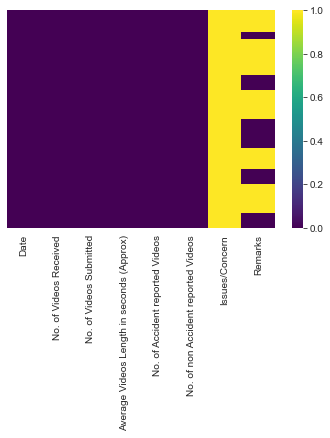

In [9]:
import seaborn as sns
sns.set_style('whitegrid')
sns.heatmap(data_Aparna.isnull(),cbar=True,yticklabels=False,cmap='viridis')

In [10]:
corr_Aparna=data_Aparna.corr()
corr_Aparna

,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern
No. of Videos Received,1.000000,1.000000,0.520268,0.780759,0.999581,NaN
No. of Videos Submitted,1.000000,1.000000,0.520268,0.780759,0.999581,NaN
Average Videos Length in seconds (Approx),0.520268,0.520268,1.000000,0.637046,0.509355,NaN
No. of Accident reported Videos,0.780759,0.780759,0.637046,1.000000,0.762344,NaN
No. of non Accident reported Videos,0.999581,0.999581,0.509355,0.762344,1.000000,NaN
Issues/Concern,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

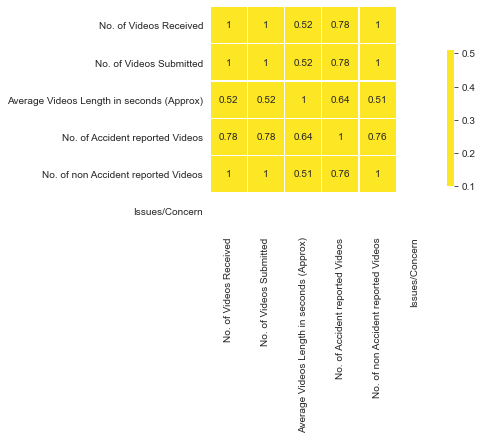

In [11]:
plt.figure(figsize=(5,5))
sns.heatmap(corr_Aparna, cmap='viridis', vmax=.1, center=0,square=True, linewidths=.1, cbar_kws={"shrink": .5}, annot=True)

In [12]:
data_Aparna.count()

Date                                         30
No. of Videos Received                       30
No. of Videos Submitted                      30
Average Videos Length in seconds (Approx)    30
No. of Accident reported Videos              30
No. of non Accident reported Videos          30
Issues/Concern                                0
Remarks                                      11
dtype: int64

In [13]:
data_Aparna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date                                       30 non-null     object 
 1   No. of Videos Received                     30 non-null     int64  
 2   No. of Videos Submitted                    30 non-null     int64  
 3   Average Videos Length in seconds (Approx)  30 non-null     int64  
 4   No. of Accident reported Videos            30 non-null     int64  
 5   No. of non Accident reported Videos        30 non-null     int64  
 6   Issues/Concern                             0 non-null      float64
 7   Remarks                                    11 non-null     object 
dtypes: float64(1), int64(5), object(2)
memory usage: 2.0+ KB


In [14]:
data_Aparna.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Submitted'].count()

Average Videos Length in seconds (Approx)
0     10
15    20
Name: No. of Videos Submitted, dtype: int64

In [15]:
data_Aparna.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Submitted'].mean()

Average Videos Length in seconds (Approx)
0      0.0
15    56.6
Name: No. of Videos Submitted, dtype: float64

In [16]:
data_Aparna.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Received'].count()

Average Videos Length in seconds (Approx)
0     10
15    20
Name: No. of Videos Received, dtype: int64

In [17]:
data_Aparna.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Received'].mean()

Average Videos Length in seconds (Approx)
0      0.0
15    56.6
Name: No. of Videos Received, dtype: float64

In [18]:
data_Aparna.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Accident reported Videos'].count()

Average Videos Length in seconds (Approx)
0     10
15    20
Name: No. of Accident reported Videos, dtype: int64

In [19]:
data_Aparna.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Accident reported Videos'].mean()

Average Videos Length in seconds (Approx)
0     0.0
15    3.1
Name: No. of Accident reported Videos, dtype: float64

In [20]:
data_Aparna.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of non Accident reported Videos'].count()

Average Videos Length in seconds (Approx)
0     10
15    20
Name: No. of non Accident reported Videos, dtype: int64

In [21]:
data_Aparna.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of non Accident reported Videos'].mean()

Average Videos Length in seconds (Approx)
0      0.0
15    53.5
Name: No. of non Accident reported Videos, dtype: float64

In [22]:
data_Aparna.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of non Accident reported Videos'].median()

Average Videos Length in seconds (Approx)
0      0
15    30
Name: No. of non Accident reported Videos, dtype: int64

In [23]:
data_Aparna['Remarks']

0                                                NaN
1                                                NaN
2                                                NaN
3               Week Off (Shift Exchange with Kiran)
4                                                NaN
5                                                NaN
6                                                NaN
7                                                NaN
8                                                NaN
9                                           Week Off
10                                          Week Off
11                                               NaN
12                                               NaN
13                                               NaN
14                                               NaN
15    Shift Exchange with Shiva Kumar and Rajeshwari
16                                          Week Off
17                                             Leave
18                                            

In [24]:
data_Aparna.columns

Index(['Date', 'No. of Videos Received', 'No. of Videos Submitted',
       'Average Videos Length in seconds (Approx)',
       'No. of Accident reported Videos',
       'No. of non Accident reported Videos', 'Issues/Concern', 'Remarks'],
      dtype='object')

In [25]:
data_Aparna.index

RangeIndex(start=0, stop=30, step=1)

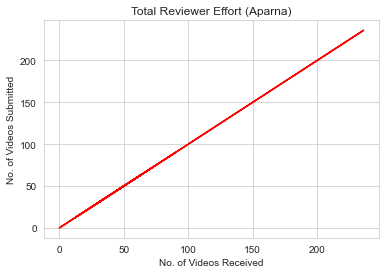

In [26]:
x = data_Aparna['No. of Videos Received'].unique()
y = data_Aparna['No. of Videos Submitted'].unique()

plt.plot(x, y,color='red')

plt.title("Total Reviewer Effort (Aparna)")
plt.xlabel("No. of Videos Received")
plt.ylabel("No. of Videos Submitted")

plt.show()

In [27]:
data_Aparna['Remarks'].unique()

array([nan, 'Week Off (Shift Exchange with Kiran)', 'Week Off',
       'Shift Exchange with Shiva Kumar and Rajeshwari', 'Leave',
       'Week Off '], dtype=object)

In [28]:
data_Aparna['Remarks'].value_counts()

Week Off                                          6
Leave                                             2
Shift Exchange with Shiva Kumar and Rajeshwari    1
Week Off                                          1
Week Off (Shift Exchange with Kiran)              1
Name: Remarks, dtype: int64

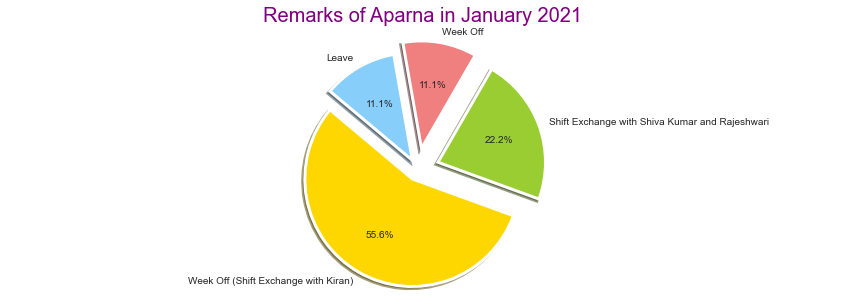

In [29]:
labels=['Week Off (Shift Exchange with Kiran)','Shift Exchange with Shiva Kumar and Rajeshwari','Week Off','Leave']
sizes = [5, 2, 1, 1]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.2, 0.2, 0.1)  # explode 1st slice

# Plot
plt.figure(figsize=(15,5))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, 
        startangle=140,wedgeprops = {'linewidth': 3})
plt.axis('equal')
plt.title('Remarks of Aparna in January 2021 ',color='purple',fontdict={'fontsize':20})
plt.show()

# 2. Kiran

In [30]:
data_Kiran=pd.read_excel("C:\\Users\Ishan.Borkar\Downloads\TPRI_agent_Effort_2021\TPRI_agent_Effort_2021_Kiran.xlsx",header=0,date_parser='Date',sheet_name=0,skiprows=1)
data_Kiran.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-01-01,0,0,0,0,0,NaN,Holiday
1,2021-01-02,0,0,0,0,0,NaN,Holiday
2,2021-01-03,0,0,0,0,0,NaN,Holiday
3,2021-01-04,1,1,15,0,1,NaN,Mutual Shift exchange with Aparna
4,2021-01-05,32,32,15,2,30,NaN,NaN


In [31]:
Count_Row=data_Kiran.shape[0]
Count_Row

31

In [32]:
data_Kiran=data_Kiran.head(Count_Row-1)
data_Kiran.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-01-01,0,0,0,0,0,NaN,Holiday
1,2021-01-02,0,0,0,0,0,NaN,Holiday
2,2021-01-03,0,0,0,0,0,NaN,Holiday
3,2021-01-04,1,1,15,0,1,NaN,Mutual Shift exchange with Aparna
4,2021-01-05,32,32,15,2,30,NaN,NaN


In [33]:
data_Kiran.shape

(30, 8)

In [34]:
data_Kiran.size

240

In [35]:
data_Kiran.isna().sum().to_frame().T

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,0,0,0,0,0,0,30,19


<AxesSubplot:>

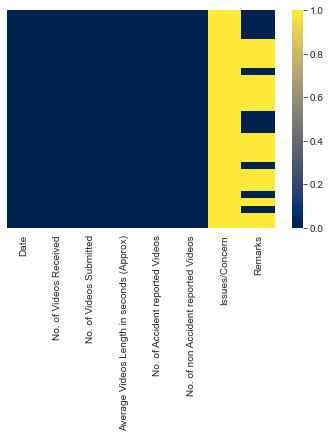

In [36]:
import seaborn as sns
sns.set_style('whitegrid')
sns.heatmap(data_Kiran.isnull(),cbar=True,yticklabels=False,cmap='cividis')

In [37]:
corr_Kiran=data_Kiran.corr()
corr_Kiran

,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern
No. of Videos Received,1.000000,1.000000,0.349806,0.411388,0.999459,NaN
No. of Videos Submitted,1.000000,1.000000,0.349806,0.411388,0.999459,NaN
Average Videos Length in seconds (Approx),0.349806,0.349806,1.000000,0.449013,0.338608,NaN
No. of Accident reported Videos,0.411388,0.411388,0.449013,1.000000,0.381190,NaN
No. of non Accident reported Videos,0.999459,0.999459,0.338608,0.381190,1.000000,NaN
Issues/Concern,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

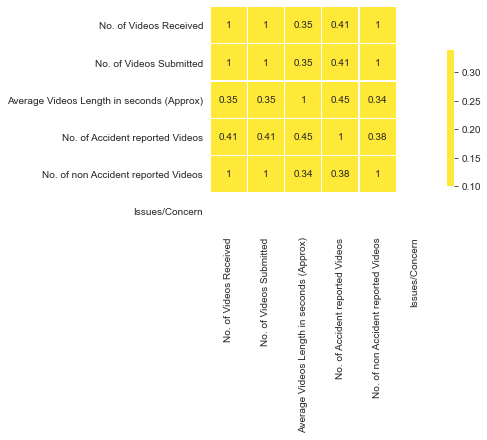

In [38]:
plt.figure(figsize=(5,5))
sns.heatmap(corr_Kiran, cmap='cividis', vmax=.1, center=0,square=True, linewidths=.1, cbar_kws={"shrink": .5}, annot=True)

In [39]:
data_Kiran.columns

Index(['Date', 'No. of Videos Received', 'No. of Videos Submitted',
       'Average Videos Length in seconds (Approx)',
       'No. of Accident reported Videos',
       'No. of non Accident reported Videos', 'Issues/Concern', 'Remarks'],
      dtype='object')

In [40]:
data_Kiran.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Received'].count()

Average Videos Length in seconds (Approx)
0      5
15    25
Name: No. of Videos Received, dtype: int64

In [41]:
data_Kiran.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Received'].mean()

Average Videos Length in seconds (Approx)
0      0.0
15    43.8
Name: No. of Videos Received, dtype: float64

In [42]:
data_Kiran.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Submitted'].count()

Average Videos Length in seconds (Approx)
0      5
15    25
Name: No. of Videos Submitted, dtype: int64

In [43]:
data_Kiran.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Submitted'].mean()

Average Videos Length in seconds (Approx)
0      0.0
15    43.8
Name: No. of Videos Submitted, dtype: float64

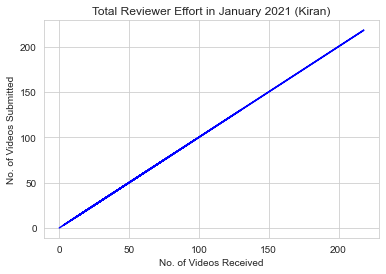

In [44]:
x = data_Kiran['No. of Videos Received'].unique()
y = data_Kiran['No. of Videos Submitted'].unique()

plt.plot(x, y,color='blue')

plt.title("Total Reviewer Effort in January 2021 (Kiran)")
plt.xlabel("No. of Videos Received")
plt.ylabel("No. of Videos Submitted")

plt.show()

In [45]:
data_Kiran.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Accident reported Videos'].count()

Average Videos Length in seconds (Approx)
0      5
15    25
Name: No. of Accident reported Videos, dtype: int64

In [46]:
data_Kiran.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Accident reported Videos'].mean()

Average Videos Length in seconds (Approx)
0     0
15    2
Name: No. of Accident reported Videos, dtype: int64

In [47]:
data_Kiran.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of non Accident reported Videos'].count()

Average Videos Length in seconds (Approx)
0      5
15    25
Name: No. of non Accident reported Videos, dtype: int64

In [48]:
data_Kiran.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of non Accident reported Videos'].mean()

Average Videos Length in seconds (Approx)
0      0.0
15    41.8
Name: No. of non Accident reported Videos, dtype: float64

In [49]:
data_Kiran['Remarks'].unique()

array(['Holiday', 'Mutual Shift exchange with Aparna', nan,
       'Holiday( Mallik shift done for 3hrs, mutual exchange)',
       'Holiday (14th night shift)',
       'Mutual shift exchange with Shiva Kumar',
       'Holiday ( Mutual shift exchange for  1 hr with Mallik )',
       '( Mutual shift exchange for  4hr with Mallik )',
       'Holiday(  Mutual shift exchange for  1 hr with Mallik )'],
      dtype=object)

In [50]:
data_Kiran['Remarks'].value_counts()

Holiday                                                    4
Holiday (14th night shift)                                 1
Mutual Shift exchange with Aparna                          1
( Mutual shift exchange for  4hr with Mallik )             1
Holiday( Mallik shift done for 3hrs, mutual exchange)      1
Mutual shift exchange with Shiva Kumar                     1
Holiday ( Mutual shift exchange for  1 hr with Mallik )    1
Holiday(  Mutual shift exchange for  1 hr with Mallik )    1
Name: Remarks, dtype: int64

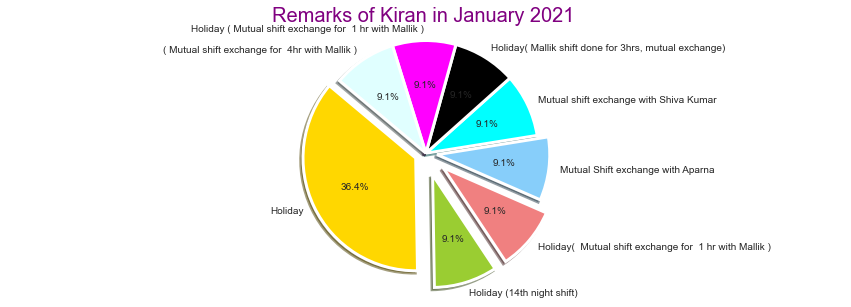

In [51]:
labels=['Holiday','Holiday (14th night shift)','Holiday(  Mutual shift exchange for  1 hr with Mallik )','Mutual Shift exchange with Aparna',                         
'Mutual shift exchange with Shiva Kumar','Holiday( Mallik shift done for 3hrs, mutual exchange)',
'Holiday ( Mutual shift exchange for  1 hr with Mallik )','( Mutual shift exchange for  4hr with Mallik )']
sizes = [4, 1, 1, 1,1,1,1,1]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','cyan','black','magenta','lightcyan']
explode = (0.1, 0.2, 0.2, 0.1,0,0,0,0)  # explode 1st slice

# Plot
plt.figure(figsize=(15,5))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, 
        startangle=140,wedgeprops = {'linewidth': 3})
plt.axis('equal')
plt.title('Remarks of Kiran in January 2021 ',color='purple',fontdict={'fontsize':20})
plt.show()

# 3. Mallikarjun

In [52]:
data_Mallikarjun=pd.read_excel("C:\\Users\Ishan.Borkar\Downloads\TPRI_agent_Effort_2021\TPRI_agent_Effort_2021_Mallikarjun.xlsx",header=0,date_parser='Date',sheet_name=0,skiprows=1)
data_Mallikarjun.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-01-01,0,0,0,0,0,NaN,Holiday
1,2021-01-02,0,0,0,0,0,NaN,Holiday
2,2021-01-03,6,6,15,1,5,NaN,NaN
3,2021-01-04,63,63,15,7,56,NaN,NaN
4,2021-01-05,40,40,15,1,39,NaN,NaN


In [53]:
CountRow=data_Mallikarjun.shape[0]
Count_Row

31

In [54]:
data_Mallikarjun=data_Mallikarjun.head(Count_Row-1)
data_Mallikarjun.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-01-01,0,0,0,0,0,NaN,Holiday
1,2021-01-02,0,0,0,0,0,NaN,Holiday
2,2021-01-03,6,6,15,1,5,NaN,NaN
3,2021-01-04,63,63,15,7,56,NaN,NaN
4,2021-01-05,40,40,15,1,39,NaN,NaN


In [55]:
print(data_Mallikarjun.shape)
print(data_Mallikarjun.size)
data_Mallikarjun.isna().sum().to_frame().T

(30, 8)
240


,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,0,0,0,0,0,0,29,17


<AxesSubplot:>

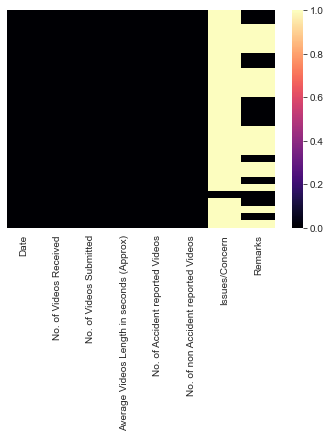

In [56]:
import seaborn as sns
sns.set_style('whitegrid')
sns.heatmap(data_Mallikarjun.isnull(),cbar=True,yticklabels=False,cmap='magma')

In [57]:
corr_Mallikarjun=data_Mallikarjun.corr()
corr_Mallikarjun

,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos
No. of Videos Received,1.000000,1.000000,0.633499,0.530947,0.999056
No. of Videos Submitted,1.000000,1.000000,0.633499,0.530947,0.999056
Average Videos Length in seconds (Approx),0.633499,0.633499,1.000000,0.613167,0.619004
No. of Accident reported Videos,0.530947,0.530947,0.613167,1.000000,0.493818
No. of non Accident reported Videos,0.999056,0.999056,0.619004,0.493818,1.000000


<AxesSubplot:>

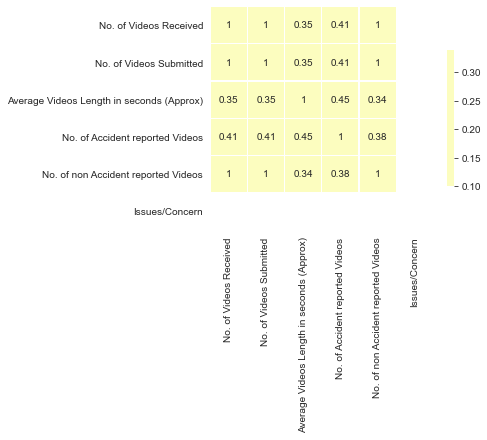

In [58]:
plt.figure(figsize=(5,5))
sns.heatmap(corr_Kiran, cmap='magma', vmax=.1, center=0,square=True, linewidths=.1, cbar_kws={"shrink": .5}, annot=True)

In [59]:
data_Mallikarjun.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Received'].count()

Average Videos Length in seconds (Approx)
0     10
15    20
Name: No. of Videos Received, dtype: int64

In [60]:
data_Mallikarjun.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Received'].mean()

Average Videos Length in seconds (Approx)
0      0.0
15    51.8
Name: No. of Videos Received, dtype: float64

In [61]:
data_Mallikarjun.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Submitted'].count()

Average Videos Length in seconds (Approx)
0     10
15    20
Name: No. of Videos Submitted, dtype: int64

In [62]:
data_Mallikarjun.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Submitted'].mean()

Average Videos Length in seconds (Approx)
0      0.0
15    51.8
Name: No. of Videos Submitted, dtype: float64

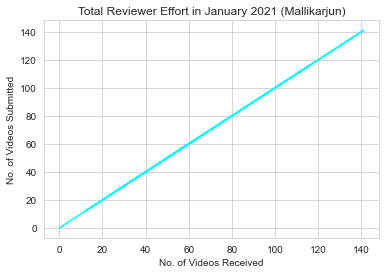

In [63]:
x = data_Mallikarjun['No. of Videos Received'].unique()
y = data_Mallikarjun['No. of Videos Submitted'].unique()

plt.plot(x, y,color='cyan')

plt.title("Total Reviewer Effort in January 2021 (Mallikarjun)")
plt.xlabel("No. of Videos Received")
plt.ylabel("No. of Videos Submitted")

plt.show()

In [64]:
data_Mallikarjun.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Accident reported Videos'].count()

Average Videos Length in seconds (Approx)
0     10
15    20
Name: No. of Accident reported Videos, dtype: int64

In [65]:
data_Mallikarjun.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Accident reported Videos'].mean()

Average Videos Length in seconds (Approx)
0     0.0
15    2.6
Name: No. of Accident reported Videos, dtype: float64

In [66]:
data_Mallikarjun.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of non Accident reported Videos'].count()

Average Videos Length in seconds (Approx)
0     10
15    20
Name: No. of non Accident reported Videos, dtype: int64

In [67]:
data_Mallikarjun.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of non Accident reported Videos'].mean()

Average Videos Length in seconds (Approx)
0      0.00
15    49.25
Name: No. of non Accident reported Videos, dtype: float64

In [68]:
data_Mallikarjun['Remarks'].unique()

array(['Holiday', nan, '(Yuvraj Night shift done) ',
       'Mutual exchange with shivam ', 'Mutual exchange with (yuvraj)',
       '( Shivam Night shift done )', 'Mutal exchange with kiran(4 hr)'],
      dtype=object)

In [69]:
data_Mallikarjun['Remarks'].value_counts()

Holiday                            7
Mutual exchange with shivam        2
Mutual exchange with (yuvraj)      1
Mutal exchange with kiran(4 hr)    1
( Shivam Night shift done )        1
(Yuvraj Night shift done)          1
Name: Remarks, dtype: int64

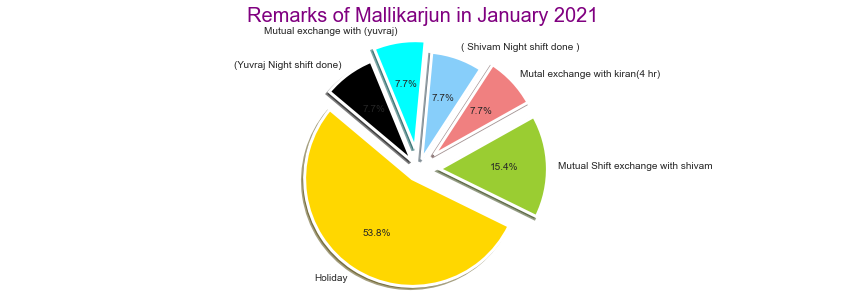

In [70]:
labels=['Holiday','Mutual Shift exchange with shivam',                         
'Mutal exchange with kiran(4 hr)','( Shivam Night shift done )',
'Mutual exchange with (yuvraj)','(Yuvraj Night shift done)']
sizes = [7, 2, 1,1,1,1]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','cyan','black']
explode = (0.1, 0.2, 0.2, 0.1,0.2,0.1)  # explode 1st slice

# Plot
plt.figure(figsize=(15,5))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, 
        startangle=140,wedgeprops = {'linewidth': 3})
plt.axis('equal')
plt.title('Remarks of Mallikarjun in January 2021 ',color='purple',fontdict={'fontsize':20})
plt.show()

# 4. Narendra

In [71]:
data_Narendra=pd.read_excel("C:\\Users\Ishan.Borkar\Downloads\TPRI_agent_Effort_2021\TPRI_agent_Effort_2021_Narendra.xlsx",header=0,date_parser='Date',sheet_name=0,skiprows=1)
data_Narendra.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-01-01,10,10,15,1,9,NaN,NaN
1,2021-01-02,0,0,0,0,0,NaN,weekoff
2,2021-01-03,66,66,15,6,60,NaN,NaN
3,2021-01-04,0,0,0,0,0,NaN,NaN
4,2021-01-05,0,0,0,0,0,NaN,NaN


In [72]:
CountRow=data_Narendra.shape[0]
Count_Row

31

In [73]:
data_Narendra.columns

Index(['Date', 'No. of Videos Received', 'No. of Videos Submitted',
       'Average Videos Length in seconds (Approx)',
       'No. of Accident reported Videos',
       'No. of non Accident reported Videos', 'Issues/Concern', 'Remarks'],
      dtype='object')

In [74]:
data_Narendra=data_Narendra.head(Count_Row-1)
data_Narendra.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-01-01,10,10,15,1,9,NaN,NaN
1,2021-01-02,0,0,0,0,0,NaN,weekoff
2,2021-01-03,66,66,15,6,60,NaN,NaN
3,2021-01-04,0,0,0,0,0,NaN,NaN
4,2021-01-05,0,0,0,0,0,NaN,NaN


In [75]:
print(data_Narendra.shape)
print(data_Narendra.size)
data_Narendra.isna().sum().to_frame().T

(30, 8)
240


,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,0,0,0,0,0,0,30,22


<AxesSubplot:>

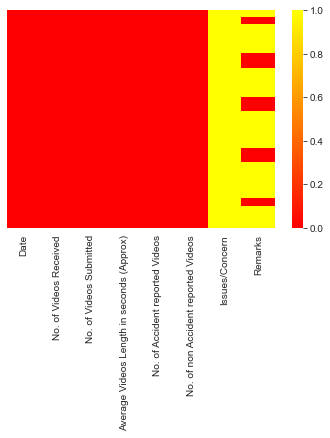

In [76]:
import seaborn as sns
sns.set_style('whitegrid')
sns.heatmap(data_Narendra.isnull(),cbar=True,yticklabels=False,cmap='autumn')

In [77]:
corr_Narendra=data_Narendra.corr()
corr_Narendra

,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern
No. of Videos Received,1.000000,1.000000,0.859797,0.848958,0.998376,NaN
No. of Videos Submitted,1.000000,1.000000,0.859797,0.848958,0.998376,NaN
Average Videos Length in seconds (Approx),0.859797,0.859797,1.000000,0.856028,0.846360,NaN
No. of Accident reported Videos,0.848958,0.848958,0.856028,1.000000,0.820599,NaN
No. of non Accident reported Videos,0.998376,0.998376,0.846360,0.820599,1.000000,NaN
Issues/Concern,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

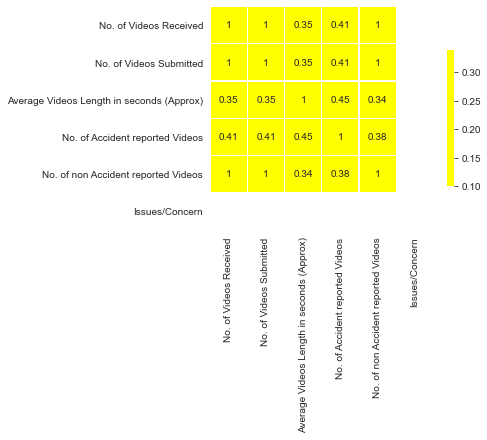

In [78]:
plt.figure(figsize=(5,5))
sns.heatmap(corr_Kiran, cmap='autumn', vmax=.1, center=0,square=True, linewidths=.1, cbar_kws={"shrink": .5}, annot=True)

In [79]:
data_Narendra.columns

Index(['Date', 'No. of Videos Received', 'No. of Videos Submitted',
       'Average Videos Length in seconds (Approx)',
       'No. of Accident reported Videos',
       'No. of non Accident reported Videos', 'Issues/Concern', 'Remarks'],
      dtype='object')

In [80]:
data_Narendra.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Received'].count()

Average Videos Length in seconds (Approx)
0     16
15    14
Name: No. of Videos Received, dtype: int64

In [81]:
data_Narendra.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Received'].mean()

Average Videos Length in seconds (Approx)
0      0.000000
15    50.071429
Name: No. of Videos Received, dtype: float64

In [82]:
data_Narendra.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Submitted'].count()

Average Videos Length in seconds (Approx)
0     16
15    14
Name: No. of Videos Submitted, dtype: int64

In [83]:
data_Narendra.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Submitted'].mean()

Average Videos Length in seconds (Approx)
0      0.000000
15    50.071429
Name: No. of Videos Submitted, dtype: float64

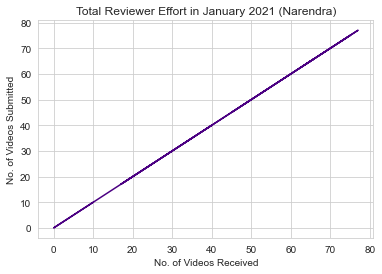

In [84]:
x = data_Narendra['No. of Videos Received'].unique()
y = data_Narendra['No. of Videos Submitted'].unique()

plt.plot(x, y,color='indigo')

plt.title("Total Reviewer Effort in January 2021 (Narendra)")
plt.xlabel("No. of Videos Received")
plt.ylabel("No. of Videos Submitted")

plt.show()

In [85]:
data_Narendra.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Accident reported Videos'].count()

Average Videos Length in seconds (Approx)
0     16
15    14
Name: No. of Accident reported Videos, dtype: int64

In [86]:
data_Narendra.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Accident reported Videos'].mean()

Average Videos Length in seconds (Approx)
0     0.000000
15    4.214286
Name: No. of Accident reported Videos, dtype: float64

In [87]:
data_Narendra.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of non Accident reported Videos'].count()

Average Videos Length in seconds (Approx)
0     16
15    14
Name: No. of non Accident reported Videos, dtype: int64

In [88]:
data_Narendra.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of non Accident reported Videos'].mean()

Average Videos Length in seconds (Approx)
0      0.000000
15    46.142857
Name: No. of non Accident reported Videos, dtype: float64

In [89]:
data_Narendra['Remarks'].unique()

array([nan, 'weekoff', 'Exchange with yuvaraja'], dtype=object)

In [90]:
data_Narendra['Remarks'].value_counts()

weekoff                   7
Exchange with yuvaraja    1
Name: Remarks, dtype: int64

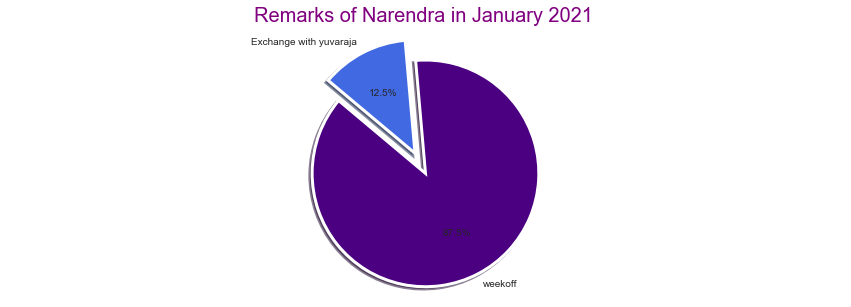

In [91]:
labels=['weekoff','Exchange with yuvaraja']
sizes = [7,1]
colors = ['indigo','royalblue']
explode = (0.1,0.1)  # explode 1st slice

# Plot
plt.figure(figsize=(15,5))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, 
        startangle=140,wedgeprops = {'linewidth': 3})
plt.axis('equal')
plt.title('Remarks of Narendra in January 2021 ',color='purple',fontdict={'fontsize':20})
plt.show()

# 5. Rajeshwari

In [92]:
data_Rajeshwari=pd.read_excel("C:\\Users\Ishan.Borkar\Downloads\TPRI_agent_Effort_2021\TPRI_agent_Effort_2021_Rajeshwari.xlsx",header=0,date_parser='Date',sheet_name=0,skiprows=1)
data_Rajeshwari.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-01-01,22,22,15,0,22,NaN,NaN
1,2021-01-02,22,22,15,2,20,NaN,WEEK OFF - Mutual Exchange (Shift supported by...
2,2021-01-03,23,23,15,1,22,NaN,NaN
3,2021-01-04,10,10,15,2,8,NaN,NaN
4,2021-01-05,17,17,15,3,14,NaN,WEEK OFF - Mutual Exchange (Shift supported to...


In [93]:
print(data_Rajeshwari.shape)
print(data_Rajeshwari.size)
data_Rajeshwari.isna().sum().to_frame().T

(32, 8)
256


,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,1,0,0,0,0,0,32,22


In [94]:
data_Rajeshwari=data_Rajeshwari.head(Count_Row-1)
data_Rajeshwari.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-01-01,22,22,15,0,22,NaN,NaN
1,2021-01-02,22,22,15,2,20,NaN,WEEK OFF - Mutual Exchange (Shift supported by...
2,2021-01-03,23,23,15,1,22,NaN,NaN
3,2021-01-04,10,10,15,2,8,NaN,NaN
4,2021-01-05,17,17,15,3,14,NaN,WEEK OFF - Mutual Exchange (Shift supported to...


<AxesSubplot:>

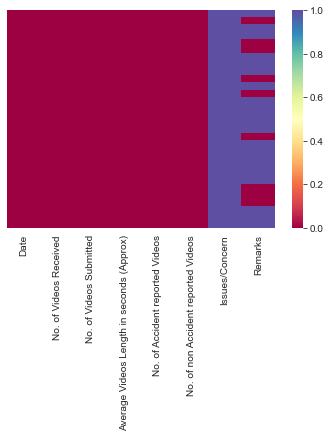

In [95]:
import seaborn as sns
sns.set_style('whitegrid')
sns.heatmap(data_Rajeshwari.isnull(),cbar=True,yticklabels=False,cmap='Spectral')

In [96]:
corr_Rajeshwari=data_Rajeshwari.corr()
corr_Rajeshwari

,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern
No. of Videos Received,1.000000,1.000000,0.332202,0.559285,0.999665,NaN
No. of Videos Submitted,1.000000,1.000000,0.332202,0.559285,0.999665,NaN
Average Videos Length in seconds (Approx),0.332202,0.332202,1.000000,0.530215,0.321332,NaN
No. of Accident reported Videos,0.559285,0.559285,0.530215,1.000000,0.537629,NaN
No. of non Accident reported Videos,0.999665,0.999665,0.321332,0.537629,1.000000,NaN
Issues/Concern,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

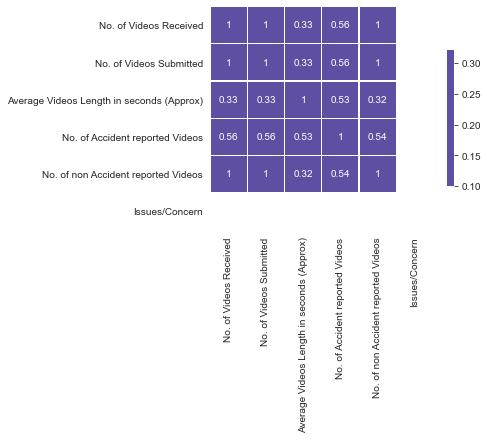

In [97]:
plt.figure(figsize=(5,5))
sns.heatmap(corr_Rajeshwari, cmap='Spectral', vmax=.1, center=0,square=True, linewidths=.1, cbar_kws={"shrink": .5}, annot=True)

In [98]:
data_Rajeshwari.columns

Index(['Date', 'No. of Videos Received', 'No. of Videos Submitted',
       'Average Videos Length in seconds (Approx)',
       'No. of Accident reported Videos',
       'No. of non Accident reported Videos', 'Issues/Concern', 'Remarks'],
      dtype='object')

In [99]:
data_Rajeshwari.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Received'].count()

Average Videos Length in seconds (Approx)
0      6
15    24
Name: No. of Videos Received, dtype: int64

In [100]:
data_Rajeshwari.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Received'].mean()

Average Videos Length in seconds (Approx)
0      0.00
15    72.25
Name: No. of Videos Received, dtype: float64

In [101]:
data_Rajeshwari.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Submitted'].mean()

Average Videos Length in seconds (Approx)
0      0.00
15    72.25
Name: No. of Videos Submitted, dtype: float64

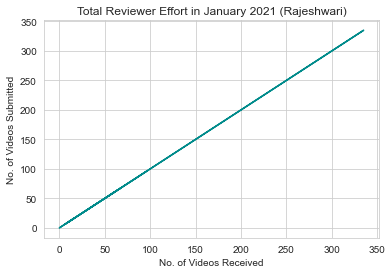

In [102]:
x = data_Rajeshwari['No. of Videos Received'].unique()
y = data_Rajeshwari['No. of Videos Submitted'].unique()

plt.plot(x, y,color='darkcyan')

plt.title("Total Reviewer Effort in January 2021 (Rajeshwari)")
plt.xlabel("No. of Videos Received")
plt.ylabel("No. of Videos Submitted")

plt.show()

In [103]:
data_Rajeshwari.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Accident reported Videos'].count()

Average Videos Length in seconds (Approx)
0      6
15    24
Name: No. of Accident reported Videos, dtype: int64

In [104]:
data_Rajeshwari.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Accident reported Videos'].mean()

Average Videos Length in seconds (Approx)
0     0.000000
15    3.541667
Name: No. of Accident reported Videos, dtype: float64

In [105]:
data_Rajeshwari.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of non Accident reported Videos'].count()

Average Videos Length in seconds (Approx)
0      6
15    24
Name: No. of non Accident reported Videos, dtype: int64

In [106]:
data_Rajeshwari.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of non Accident reported Videos'].mean()

Average Videos Length in seconds (Approx)
0      0.000000
15    68.708333
Name: No. of non Accident reported Videos, dtype: float64

In [107]:
data_Rajeshwari['Remarks'].unique()

array([nan, 'WEEK OFF - Mutual Exchange (Shift supported by Yuvaraja)',
       'WEEK OFF - Mutual Exchange (Shift supported to Yuvaraja)',
       'WEEK OFF'], dtype=object)

In [108]:
data_Rajeshwari['Remarks'].value_counts()

WEEK OFF                                                    5
WEEK OFF - Mutual Exchange (Shift supported to Yuvaraja)    2
WEEK OFF - Mutual Exchange (Shift supported by Yuvaraja)    2
Name: Remarks, dtype: int64

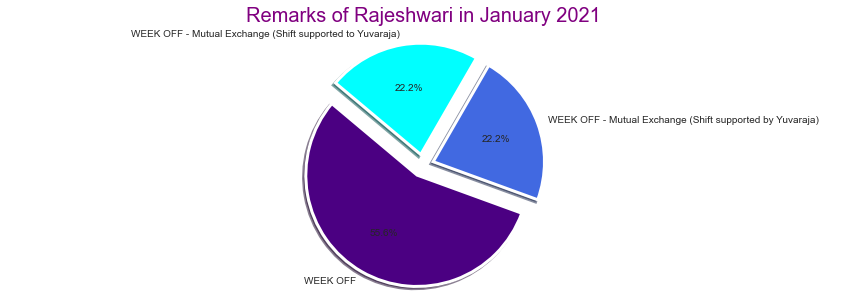

In [109]:
labels=['WEEK OFF','WEEK OFF - Mutual Exchange (Shift supported by Yuvaraja)',
        'WEEK OFF - Mutual Exchange (Shift supported to Yuvaraja)']
sizes = [5,2,2]
colors = ['indigo','royalblue','cyan']
explode = (0.1,0.1,0.1)  # explode 1st slice

# Plot
plt.figure(figsize=(15,5))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, 
        startangle=140,wedgeprops = {'linewidth': 3})
plt.axis('equal')
plt.title('Remarks of Rajeshwari in January 2021 ',color='purple',fontdict={'fontsize':20})
plt.show()

# 6. Shivakumar

In [110]:
data_Shivakumar=pd.read_excel("C:\\Users\Ishan.Borkar\Downloads\TPRI_agent_Effort_2021\TPRI_agent_Effort_2021_Shivakumar.xlsx",header=0,date_parser='Date',sheet_name=0,skiprows=1)
data_Shivakumar.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-01-01,34,34,15,2,32,NaN,NaN
1,2021-01-02,44,44,15,5,39,NaN,NaN
2,2021-01-03,23,23,15,1,22,NaN,NaN
3,2021-01-04,12,12,15,3,9,NaN,NaN
4,2021-01-05,0,0,0,0,0,NaN,Week Off


In [111]:
print(data_Shivakumar.shape)
print(data_Shivakumar.size)
data_Shivakumar.isna().sum().to_frame().T

(31, 8)
248


,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,1,0,0,0,0,0,31,25


In [112]:
data_Shivakumar=data_Shivakumar.head(Count_Row-1)
data_Shivakumar.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-01-01,34,34,15,2,32,NaN,NaN
1,2021-01-02,44,44,15,5,39,NaN,NaN
2,2021-01-03,23,23,15,1,22,NaN,NaN
3,2021-01-04,12,12,15,3,9,NaN,NaN
4,2021-01-05,0,0,0,0,0,NaN,Week Off


<AxesSubplot:>

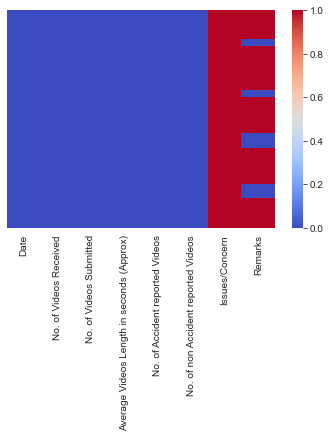

In [113]:
import seaborn as sns
sns.set_style('whitegrid')
sns.heatmap(data_Shivakumar.isnull(),cbar=True,yticklabels=False,cmap='coolwarm')

In [114]:
data_Shivakumar.columns

Index(['Date', 'No. of Videos Received', 'No. of Videos Submitted',
       'Average Videos Length in seconds (Approx)',
       'No. of Accident reported Videos',
       'No. of non Accident reported Videos', 'Issues/Concern', 'Remarks'],
      dtype='object')

In [115]:
corr_Shivakumar=data_Shivakumar.corr()
corr_Shivakumar

,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern
No. of Videos Received,1.000000,1.000000,0.398897,0.518668,0.999372,NaN
No. of Videos Submitted,1.000000,1.000000,0.398897,0.518668,0.999372,NaN
Average Videos Length in seconds (Approx),0.398897,0.398897,1.000000,0.452197,0.388479,NaN
No. of Accident reported Videos,0.518668,0.518668,0.452197,1.000000,0.488046,NaN
No. of non Accident reported Videos,0.999372,0.999372,0.388479,0.488046,1.000000,NaN
Issues/Concern,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

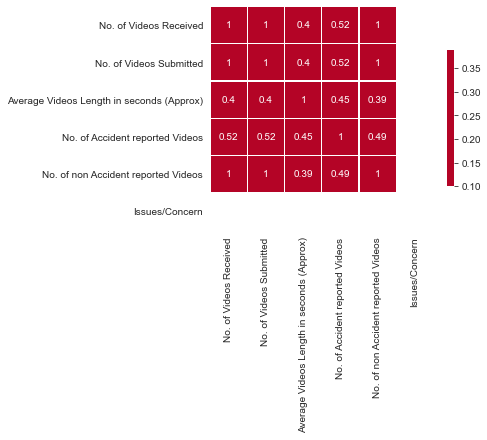

In [116]:
plt.figure(figsize=(5,5))
sns.heatmap(corr_Shivakumar, cmap='coolwarm', vmax=.1, center=0,square=True, linewidths=.1, cbar_kws={"shrink": .5}, annot=True)

In [117]:
data_Shivakumar.columns

Index(['Date', 'No. of Videos Received', 'No. of Videos Submitted',
       'Average Videos Length in seconds (Approx)',
       'No. of Accident reported Videos',
       'No. of non Accident reported Videos', 'Issues/Concern', 'Remarks'],
      dtype='object')

In [118]:
data_Shivakumar.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Received'].count()

Average Videos Length in seconds (Approx)
0      7
15    23
Name: No. of Videos Received, dtype: int64

In [119]:
data_Shivakumar.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Received'].mean()

Average Videos Length in seconds (Approx)
0      4.285714
15    69.739130
Name: No. of Videos Received, dtype: float64

In [120]:
data_Shivakumar.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Submitted'].count()

Average Videos Length in seconds (Approx)
0      7
15    23
Name: No. of Videos Submitted, dtype: int64

In [121]:
data_Shivakumar.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Submitted'].mean()

Average Videos Length in seconds (Approx)
0      4.285714
15    69.739130
Name: No. of Videos Submitted, dtype: float64

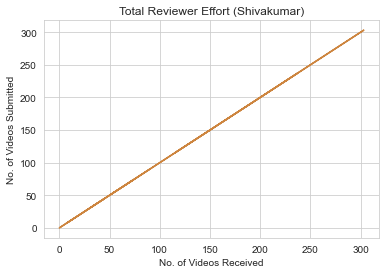

In [122]:
x = data_Shivakumar['No. of Videos Received'].unique()
y = data_Shivakumar['No. of Videos Submitted'].unique()

plt.plot(x, y,color='peru')

plt.title("Total Reviewer Effort (Shivakumar)")
plt.xlabel("No. of Videos Received")
plt.ylabel("No. of Videos Submitted")

plt.show()

In [123]:
data_Shivakumar.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Accident reported Videos'].count()

Average Videos Length in seconds (Approx)
0      7
15    23
Name: No. of Accident reported Videos, dtype: int64

In [124]:
data_Shivakumar.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Accident reported Videos'].mean()

Average Videos Length in seconds (Approx)
0     0.857143
15    3.869565
Name: No. of Accident reported Videos, dtype: float64

In [125]:
data_Shivakumar.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of non Accident reported Videos'].count()

Average Videos Length in seconds (Approx)
0      7
15    23
Name: No. of non Accident reported Videos, dtype: int64

In [126]:
data_Shivakumar.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of non Accident reported Videos'].mean()

Average Videos Length in seconds (Approx)
0      3.428571
15    65.869565
Name: No. of non Accident reported Videos, dtype: float64

In [127]:
data_Shivakumar['Remarks'].unique()

array([nan, 'Week Off'], dtype=object)

In [128]:
data_Shivakumar['Remarks'].value_counts()

Week Off    6
Name: Remarks, dtype: int64

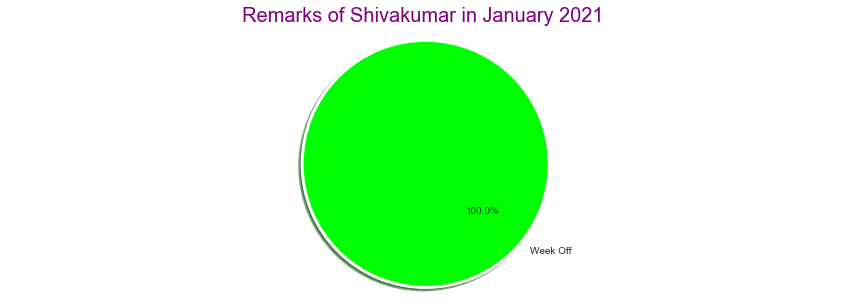

In [129]:
labels=['Week Off']
sizes = [6]
colors = ['lime']

# Plot
plt.figure(figsize=(15,5))
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, 
        startangle=140,wedgeprops = {'linewidth': 3})
plt.axis('equal')
plt.title('Remarks of Shivakumar in January 2021 ',color='purple',fontdict={'fontsize':20})
plt.show()

# 7. Shivam

In [130]:
data_Shivam=pd.read_excel("C:\\Users\Ishan.Borkar\Downloads\TPRI_agent_Effort_2021\TPRI_agent_Effort_2021_Shivam.xlsx",header=0,date_parser='Date',skiprows=1,sheet_name=0)
data_Shivam.head(32)

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-01-01,21,21,15,1,20,NaN,NaN
1,2021-01-02,57,57,15,5,52,NaN,NaN
2,2021-01-03,11,11,15,1,10,NaN,NaN
3,2021-01-04,0,0,0,0,0,NaN,NaN
4,2021-01-05,3,3,15,0,3,NaN,NaN
5,2021-01-06,2,2,15,0,2,NaN,NaN
6,2021-01-07,10,10,15,0,10,NaN,NaN
7,2021-01-08,16,16,15,0,16,NaN,NaN
8,2021-01-09,79,79,15,2,77,NaN,NaN
9,2021-01-10,0,0,0,0,0,NaN,NaN


In [131]:
print(data_Shivam.shape)
print(data_Shivam.size)
data_Shivam.isna().sum().to_frame().T

(32, 8)
256


,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,1,0,0,0,0,0,32,32


In [132]:
Count_Row=data_Shivam.shape[0]
Count_Row

32

In [133]:
data_Shivam=data_Shivam.head(Count_Row-1)
data_Shivam.head(100)

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-01-01,21,21,15,1,20,NaN,NaN
1,2021-01-02,57,57,15,5,52,NaN,NaN
2,2021-01-03,11,11,15,1,10,NaN,NaN
3,2021-01-04,0,0,0,0,0,NaN,NaN
4,2021-01-05,3,3,15,0,3,NaN,NaN
5,2021-01-06,2,2,15,0,2,NaN,NaN
6,2021-01-07,10,10,15,0,10,NaN,NaN
7,2021-01-08,16,16,15,0,16,NaN,NaN
8,2021-01-09,79,79,15,2,77,NaN,NaN
9,2021-01-10,0,0,0,0,0,NaN,NaN


<AxesSubplot:>

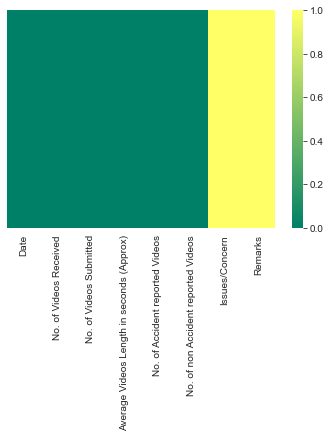

In [134]:
import seaborn as sns
sns.set_style('whitegrid')
sns.heatmap(data_Shivam.isnull(),cbar=True,yticklabels=False,cmap='summer')

In [135]:
corr_Shivam=data_Shivam.corr()
corr_Shivam

,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
No. of Videos Received,1.000000,1.000000,0.455383,0.794769,0.999339,NaN,NaN
No. of Videos Submitted,1.000000,1.000000,0.455383,0.794769,0.999339,NaN,NaN
Average Videos Length in seconds (Approx),0.455383,0.455383,1.000000,0.489080,0.447463,NaN,NaN
No. of Accident reported Videos,0.794769,0.794769,0.489080,1.000000,0.772174,NaN,NaN
No. of non Accident reported Videos,0.999339,0.999339,0.447463,0.772174,1.000000,NaN,NaN
Issues/Concern,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Remarks,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

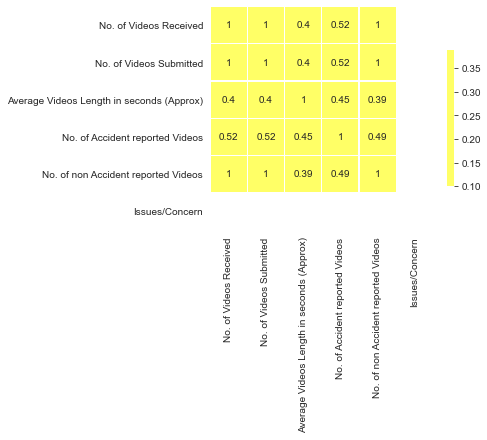

In [136]:
plt.figure(figsize=(5,5))
sns.heatmap(corr_Shivakumar, cmap='summer', vmax=.1, center=0,square=True, linewidths=.1, cbar_kws={"shrink": .5}, annot=True)

In [137]:
data_Shivam.columns

Index(['Date', 'No. of Videos Received', 'No. of Videos Submitted',
       'Average Videos Length in seconds (Approx)',
       'No. of Accident reported Videos',
       'No. of non Accident reported Videos', 'Issues/Concern', 'Remarks'],
      dtype='object')

In [138]:
data_Shivam.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Received'].count()

Average Videos Length in seconds (Approx)
0      9
15    22
Name: No. of Videos Received, dtype: int64

In [139]:
data_Shivam.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Received'].mean()

Average Videos Length in seconds (Approx)
0      0.000000
15    46.590909
Name: No. of Videos Received, dtype: float64

In [140]:
data_Shivam.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Submitted'].count()

Average Videos Length in seconds (Approx)
0      9
15    22
Name: No. of Videos Submitted, dtype: int64

In [141]:
data_Shivam.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Submitted'].mean()

Average Videos Length in seconds (Approx)
0      0.000000
15    46.590909
Name: No. of Videos Submitted, dtype: float64

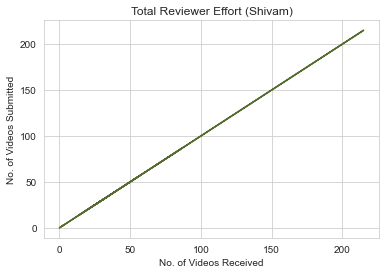

In [142]:
x = data_Shivam['No. of Videos Received'].unique()
y = data_Shivam['No. of Videos Submitted'].unique()

plt.plot(x, y,color='darkolivegreen')

plt.title("Total Reviewer Effort (Shivam)")
plt.xlabel("No. of Videos Received")
plt.ylabel("No. of Videos Submitted")

plt.show()

In [143]:
data_Shivam.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Accident reported Videos'].count()

Average Videos Length in seconds (Approx)
0      9
15    22
Name: No. of Accident reported Videos, dtype: int64

In [144]:
data_Shivam.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Accident reported Videos'].mean()

Average Videos Length in seconds (Approx)
0     0.000000
15    2.863636
Name: No. of Accident reported Videos, dtype: float64

In [145]:
data_Shivam.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of non Accident reported Videos'].count()

Average Videos Length in seconds (Approx)
0      9
15    22
Name: No. of non Accident reported Videos, dtype: int64

In [146]:
data_Shivam.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of non Accident reported Videos'].mean()

Average Videos Length in seconds (Approx)
0      0.000000
15    43.727273
Name: No. of non Accident reported Videos, dtype: float64

In [147]:
data_Shivam['Remarks'].unique()

array([nan])

# 8. Yuvaraja

In [148]:
data_Yuvaraja=pd.read_excel("C:\\Users\Ishan.Borkar\Downloads\TPRI_agent_Effort_2021\TPRI_agent_Effort_2021_Yuvaraja.xlsx",header=0,date_parser='Date',sheet_name=0,skiprows=1)
data_Yuvaraja.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-01-01,43,43,15,4,39,NaN,NaN
1,2021-01-02,30,30,15,3,27,NaN,NaN
2,2021-01-03,5,5,15,2,3,NaN,NaN
3,2021-01-04,85,85,15,10,75,NaN,NaN
4,2021-01-05,36,36,15,1,35,NaN,NaN


In [149]:
print(data_Yuvaraja.shape)
print(data_Yuvaraja.size)
data_Yuvaraja.isna().sum().to_frame().T

(31, 8)
248


,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,1,0,0,0,0,0,31,29


In [150]:
Count_Row=data_Yuvaraja.shape[0]
Count_Row

31

In [151]:
data_Yuvaraja=data_Yuvaraja.head(Count_Row-1)
data_Yuvaraja.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-01-01,43,43,15,4,39,NaN,NaN
1,2021-01-02,30,30,15,3,27,NaN,NaN
2,2021-01-03,5,5,15,2,3,NaN,NaN
3,2021-01-04,85,85,15,10,75,NaN,NaN
4,2021-01-05,36,36,15,1,35,NaN,NaN


<AxesSubplot:>

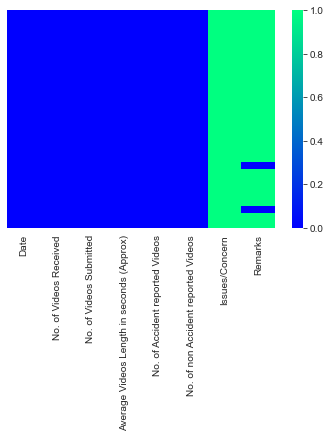

In [152]:
import seaborn as sns
sns.set_style('whitegrid')
sns.heatmap(data_Yuvaraja.isnull(),cbar=True,yticklabels=False,cmap='winter')

In [153]:
corr_Yuvaraja=data_Yuvaraja.corr()
corr_Yuvaraja

,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern
No. of Videos Received,1.000000,1.000000,0.338209,0.493124,0.999290,NaN
No. of Videos Submitted,1.000000,1.000000,0.338209,0.493124,0.999290,NaN
Average Videos Length in seconds (Approx),0.338209,0.338209,1.000000,0.360403,0.329582,NaN
No. of Accident reported Videos,0.493124,0.493124,0.360403,1.000000,0.459989,NaN
No. of non Accident reported Videos,0.999290,0.999290,0.329582,0.459989,1.000000,NaN
Issues/Concern,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

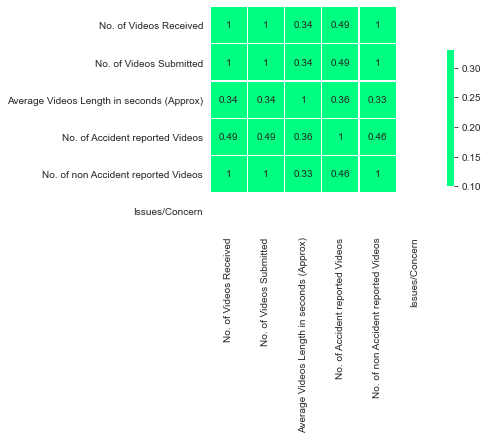

In [154]:
plt.figure(figsize=(5,5))
sns.heatmap(corr_Yuvaraja, cmap='winter', vmax=.1, center=0,square=True, linewidths=.1, cbar_kws={"shrink": .5}, annot=True)

In [155]:
data_Yuvaraja.columns

Index(['Date', 'No. of Videos Received', 'No. of Videos Submitted',
       'Average Videos Length in seconds (Approx)',
       'No. of Accident reported Videos',
       'No. of non Accident reported Videos', 'Issues/Concern', 'Remarks'],
      dtype='object')

In [156]:
data_Yuvaraja.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Received'].count()

Average Videos Length in seconds (Approx)
0      4
15    26
Name: No. of Videos Received, dtype: int64

In [157]:
data_Yuvaraja.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Received'].mean()

Average Videos Length in seconds (Approx)
0      0.000000
15    53.576923
Name: No. of Videos Received, dtype: float64

In [158]:
data_Yuvaraja.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Submitted'].count()

Average Videos Length in seconds (Approx)
0      4
15    26
Name: No. of Videos Submitted, dtype: int64

In [159]:
data_Yuvaraja.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Videos Submitted'].mean()

Average Videos Length in seconds (Approx)
0      0.000000
15    53.576923
Name: No. of Videos Submitted, dtype: float64

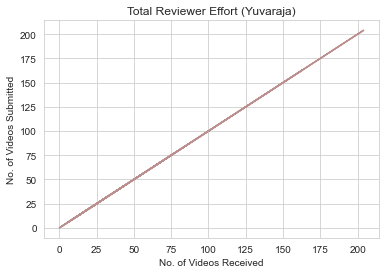

In [160]:
x = data_Yuvaraja['No. of Videos Received'].unique()
y = data_Yuvaraja['No. of Videos Submitted'].unique()

plt.plot(x, y,color='rosybrown')

plt.title("Total Reviewer Effort (Yuvaraja)")
plt.xlabel("No. of Videos Received")
plt.ylabel("No. of Videos Submitted")

plt.show()

In [161]:
data_Yuvaraja.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Accident reported Videos'].count()

Average Videos Length in seconds (Approx)
0      4
15    26
Name: No. of Accident reported Videos, dtype: int64

In [162]:
data_Yuvaraja.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of Accident reported Videos'].mean()

Average Videos Length in seconds (Approx)
0     0.000000
15    2.423077
Name: No. of Accident reported Videos, dtype: float64

In [163]:
data_Yuvaraja.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of non Accident reported Videos'].count()

Average Videos Length in seconds (Approx)
0      4
15    26
Name: No. of non Accident reported Videos, dtype: int64

In [164]:
data_Yuvaraja.groupby(by=['Average Videos Length in seconds (Approx)'])['No. of non Accident reported Videos'].mean()

Average Videos Length in seconds (Approx)
0      0.000000
15    51.153846
Name: No. of non Accident reported Videos, dtype: float64

In [165]:
data_Yuvaraja['Remarks'].unique()

array([nan, 'weekoff'], dtype=object)

In [166]:
data_Yuvaraja['Remarks'].value_counts()

weekoff    2
Name: Remarks, dtype: int64

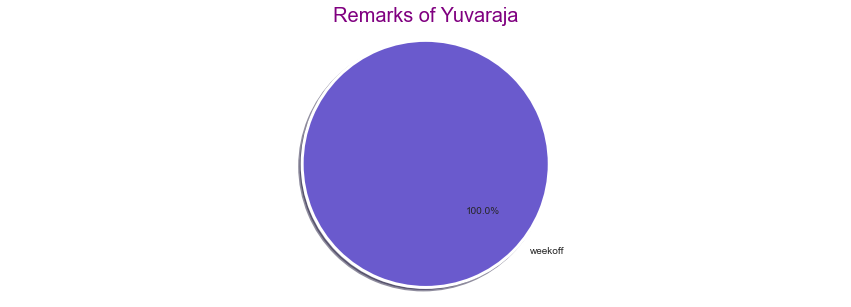

In [167]:
labels=['weekoff']
sizes = [7]
colors = ['slateblue']
# explode = (0.1,0.1)  # explode 1st slice

# Plot
plt.figure(figsize=(15,5))
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, 
        startangle=140,wedgeprops = {'linewidth': 3})
plt.axis('equal')
plt.title('Remarks of Yuvaraja',color='purple',fontdict={'fontsize':20})
plt.show()

## II) Finding total videos received in month of January 2021

In [168]:
a=data_Aparna['No. of Videos Received'].sum().astype('int')
print("No. of Videos Received by Aparna =",a)

No. of Videos Received by Aparna = 1132


In [169]:
b=data_Kiran['No. of Videos Received'].sum().astype('int')
print("No. of Videos Received by Kiran =",b)

No. of Videos Received by Kiran = 1095


In [170]:
c=data_Mallikarjun['No. of Videos Received'].sum().astype('int')
print("No. of Videos Received by Mallikarjun =",c)

No. of Videos Received by Mallikarjun = 1036


In [171]:
d=data_Narendra['No. of Videos Received'].sum().astype('int')
print("No. of Videos Received by Narendra =",d)

No. of Videos Received by Narendra = 701


In [172]:
e=data_Rajeshwari['No. of Videos Received'].sum().astype('int')
print("No. of Videos Received by Rajeshwari =",e)

No. of Videos Received by Rajeshwari = 1734


In [173]:
f=data_Shivakumar['No. of Videos Received'].sum().astype('int')
print("No. of Videos Received by Shivakumar =",f)

No. of Videos Received by Shivakumar = 1634


In [174]:
g=data_Shivam['No. of Videos Received'].sum().astype('int')
print("No. of Videos Received by Shivam =",g)

No. of Videos Received by Shivam = 1025


In [175]:
h=data_Yuvaraja['No. of Videos Received'].sum().astype('int')
print("No. of Videos Received by Yuvaraja =",h)

No. of Videos Received by Yuvaraja = 1393


In [176]:
# Total videos received by the reviewers in 1 month (January 2021)
total_videos_received=a+b+c+d+e+f+g+h
print("Total received videos in the month of January 2021 = ",total_videos_received)

Total received videos in the month of January 2021 =  9750


## Total videos submitted by the reviewers in 1 month (January 2021)

In [177]:
a1=data_Aparna['No. of Videos Submitted'].sum().astype('int')
print("No. of Videos Submitted by Aparna =",a1)
b1=data_Kiran['No. of Videos Submitted'].sum().astype('int')
print("No. of Videos Submitted by Kiran =", b1)
c1=data_Mallikarjun['No. of Videos Submitted'].sum().astype('int')
print("No. of Videos Submitted by Mallikarjun =",c1)
d1=data_Narendra['No. of Videos Submitted'].sum().astype('int')
print("No. of Videos Submitted by Narendra =",d1)
e1=data_Rajeshwari['No. of Videos Submitted'].sum().astype('int')
print("No. of Videos Submitted by Rajeshwari =",e1)
f1=data_Shivakumar['No. of Videos Submitted'].sum().astype('int')
print("No. of Videos Submitted by Shivakumar =",f1)
g1=data_Shivam['No. of Videos Submitted'].sum().astype('int')
print("No. of Videos Submitted by Shivam =",g1)
h1=data_Yuvaraja['No. of Videos Submitted'].sum().astype('int')
print("No. of Videos Submitted by Yuvaraja =",h1)
total_videos_submitted=a1+b1+c1+d1+e1+f1+g1+h1
print("Total submitted videos in the month of January 2021 = ",total_videos_submitted)

No. of Videos Submitted by Aparna = 1132
No. of Videos Submitted by Kiran = 1095
No. of Videos Submitted by Mallikarjun = 1036
No. of Videos Submitted by Narendra = 701
No. of Videos Submitted by Rajeshwari = 1734
No. of Videos Submitted by Shivakumar = 1634
No. of Videos Submitted by Shivam = 1025
No. of Videos Submitted by Yuvaraja = 1393
Total submitted videos in the month of January 2021 =  9750


## III) Total effort of TPRI Reviewer team in the month of Janury 2021

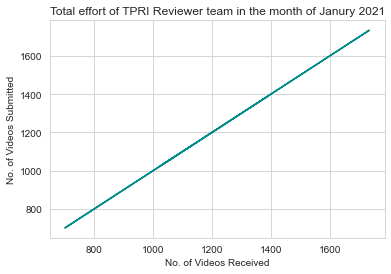

In [178]:
x = [a,b,c,d,e,f,g,h]
y = [a1,b1,c1,d1,e1,f1,g1,h1]

plt.plot(x, y,color='darkcyan')

plt.title("Total effort of TPRI Reviewer team in the month of Janury 2021")
plt.xlabel("No. of Videos Received")
plt.ylabel("No. of Videos Submitted")

plt.show()

## IV) No of accident vs non accidents reported by TPRI Reviewers Team in a month of January 2021

In [179]:
print("No. of Accident reported Videos by Aparna = ", data_Aparna['No. of Accident reported Videos'].sum())
print("No. of Accident reported Videos by Kiran = ", data_Kiran['No. of Accident reported Videos'].sum())
print("No. of Accident reported Videos by Mallikarjun = ", data_Mallikarjun['No. of Accident reported Videos'].sum())
print("No. of Accident reported Videos by Narendra = ", data_Narendra['No. of Accident reported Videos'].sum().astype('int'))
print("No. of Accident reported Videos by Rajeshwari = ", data_Rajeshwari['No. of Accident reported Videos'].sum())
print("No. of Accident reported Videos by Shivakumar = ", data_Shivakumar['No. of Accident reported Videos'].sum())
print("No. of Accident reported Videos by Shivam = ", data_Shivam['No. of Accident reported Videos'].sum())
print("No. of Accident reported Videos by Yuvaraja = ", data_Yuvaraja['No. of Accident reported Videos'].sum())
total_accidents_reported=(data_Aparna['No. of Accident reported Videos'].sum()+data_Kiran['No. of Accident reported Videos'].sum()+data_Mallikarjun['No. of Accident reported Videos'].sum()+data_Narendra['No. of Accident reported Videos'].sum().astype('int')+
data_Rajeshwari['No. of Accident reported Videos'].sum()+data_Shivakumar['No. of Accident reported Videos'].sum()+
data_Shivam['No. of Accident reported Videos'].sum()+data_Yuvaraja['No. of Accident reported Videos'].sum())
print("Total No. of Accident reported Videos in the month of January 2021 = ",total_accidents_reported)

No. of Accident reported Videos by Aparna =  62
No. of Accident reported Videos by Kiran =  50
No. of Accident reported Videos by Mallikarjun =  52
No. of Accident reported Videos by Narendra =  59
No. of Accident reported Videos by Rajeshwari =  85
No. of Accident reported Videos by Shivakumar =  95
No. of Accident reported Videos by Shivam =  63
No. of Accident reported Videos by Yuvaraja =  63
Total No. of Accident reported Videos in the month of January 2021 =  529


In [180]:
print("No. of non Accident reported Videos by Aparna = ", data_Aparna['No. of non Accident reported Videos'].sum())
print("No. of non Accident reported Videos by Kiran = ", data_Kiran['No. of non Accident reported Videos'].sum())
print("No. of non Accident reported Videos by Mallikarjun = ", data_Mallikarjun['No. of non Accident reported Videos'].sum())
print("No. of non Accident reported Videos by Narendra = ", data_Narendra['No. of non Accident reported Videos'].sum().astype('int'))
print("No. of non Accident reported Videos by Rajeshwari = ", data_Rajeshwari['No. of non Accident reported Videos'].sum())
print("No. of non Accident reported Videos by Shivakumar = ", data_Shivakumar['No. of non Accident reported Videos'].sum())
print("No. of non Accident reported Videos by Shivam = ", data_Shivam['No. of non Accident reported Videos'].sum())
print("No. of non Accident reported Videos by Yuvaraja = ", data_Yuvaraja['No. of non Accident reported Videos'].sum())
total_non_accidents_reported=(data_Aparna['No. of non Accident reported Videos'].sum()+data_Kiran['No. of non Accident reported Videos'].sum()+data_Mallikarjun['No. of non Accident reported Videos'].sum()+data_Narendra['No. of Accident reported Videos'].sum().astype('int')+
data_Rajeshwari['No. of non Accident reported Videos'].sum()+data_Shivakumar['No. of non Accident reported Videos'].sum()+
data_Shivam['No. of non Accident reported Videos'].sum()+data_Yuvaraja['No. of non Accident reported Videos'].sum())
print("Total No. of non Accident reported Videos in the month of January 2021 = ",total_non_accidents_reported)

No. of non Accident reported Videos by Aparna =  1070
No. of non Accident reported Videos by Kiran =  1045
No. of non Accident reported Videos by Mallikarjun =  985
No. of non Accident reported Videos by Narendra =  646
No. of non Accident reported Videos by Rajeshwari =  1649
No. of non Accident reported Videos by Shivakumar =  1539
No. of non Accident reported Videos by Shivam =  962
No. of non Accident reported Videos by Yuvaraja =  1330
Total No. of non Accident reported Videos in the month of January 2021 =  8639


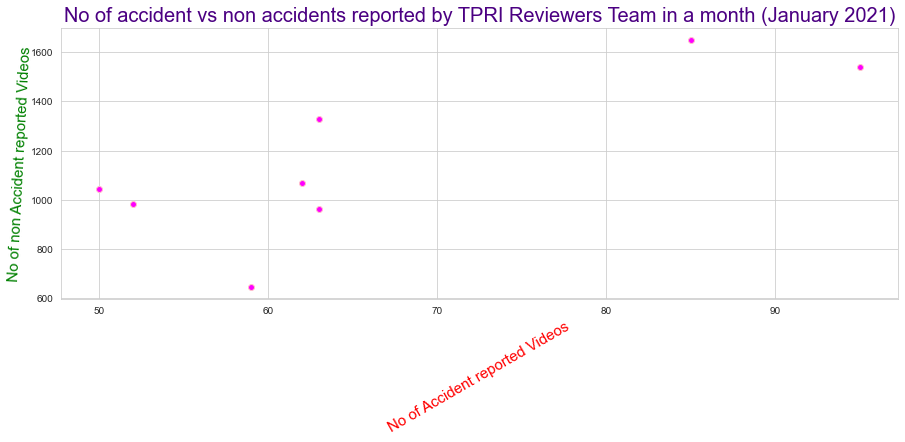

In [181]:
x=[data_Aparna['No. of Accident reported Videos'].sum(),data_Kiran['No. of Accident reported Videos'].sum(),
  data_Mallikarjun['No. of Accident reported Videos'].sum(),data_Narendra['No. of Accident reported Videos'].sum(),
  data_Rajeshwari['No. of Accident reported Videos'].sum(), data_Shivakumar['No. of Accident reported Videos'].sum(),
  data_Shivam['No. of Accident reported Videos'].sum(),data_Yuvaraja['No. of Accident reported Videos'].sum().astype('int')]

y=[data_Aparna['No. of non Accident reported Videos'].sum(),data_Kiran['No. of non Accident reported Videos'].sum(),
  data_Mallikarjun['No. of non Accident reported Videos'].sum(),data_Narendra['No. of non Accident reported Videos'].sum(),
  data_Rajeshwari['No. of non Accident reported Videos'].sum(), data_Shivakumar['No. of non Accident reported Videos'].sum(),
  data_Shivam['No. of non Accident reported Videos'].sum(),data_Yuvaraja['No. of non Accident reported Videos'].sum()]

plt.figure(figsize=(15,5))
plt.xlabel("No of Accident reported Videos",color='red',fontdict={'fontsize':15},rotation=30)
plt.ylabel("No of non Accident reported Videos",color='green',fontdict={'fontsize':15},rotation=87)
plt.title("No of accident vs non accidents reported by TPRI Reviewers Team in a month (January 2021)",fontdict={'fontsize':20},color='indigo')
plt.scatter(x, y, c =["magenta"],vmax=1,vmin=0,norm=0.1,edgecolors='pink')
plt.show()

Average Videos Length in seconds (Approx) by Aparna = 300
Average Videos Length in seconds (Approx) by Kiran = 375
Average Videos Length in seconds (Approx) by Mallikarjun = 300
Average Videos Length in seconds (Approx) by Narendra = 210
Average Videos Length in seconds (Approx) by Rajeshwari = 360
Average Videos Length in seconds (Approx) by Shivakumar = 345
Average Videos Length in seconds (Approx) by Shivam = 330
Average Videos Length in seconds (Approx) by Yuvaraja = 390
Total Average Videos Length in seconds (Approx) in the month of January 2021 =  2610


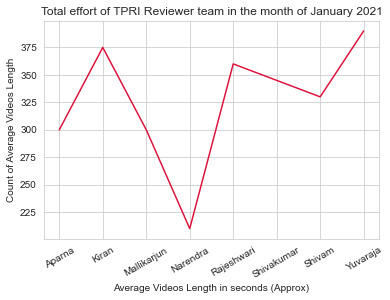

In [182]:
# Total average length of videos  received by the reviewers in 1 month (January 2021)
a1=data_Aparna['Average Videos Length in seconds (Approx)'].sum().astype('int')
print("Average Videos Length in seconds (Approx) by Aparna =",a1)
b1=data_Kiran['Average Videos Length in seconds (Approx)'].sum().astype('int')
print("Average Videos Length in seconds (Approx) by Kiran =", b1)
c1=data_Mallikarjun['Average Videos Length in seconds (Approx)'].sum().astype('int')
print("Average Videos Length in seconds (Approx) by Mallikarjun =",c1)
d1=data_Narendra['Average Videos Length in seconds (Approx)'].sum().astype('int')
print("Average Videos Length in seconds (Approx) by Narendra =",d1)
e1=data_Rajeshwari['Average Videos Length in seconds (Approx)'].sum().astype('int')
print("Average Videos Length in seconds (Approx) by Rajeshwari =",e1)
f1=data_Shivakumar['Average Videos Length in seconds (Approx)'].sum().astype('int')
print("Average Videos Length in seconds (Approx) by Shivakumar =",f1)
g1=data_Shivam['Average Videos Length in seconds (Approx)'].sum().astype('int')
print("Average Videos Length in seconds (Approx) by Shivam =",g1)
h1=data_Yuvaraja['Average Videos Length in seconds (Approx)'].sum().astype('int')
print("Average Videos Length in seconds (Approx) by Yuvaraja =",h1)
total_average_videos_length=a1+b1+c1+d1+e1+f1+g1+h1
print("Total Average Videos Length in seconds (Approx) in the month of January 2021 = ",total_average_videos_length)

x=['Aparna','Kiran','Mallikarjun','Narendra','Rajeshwari','Shivakumar','Shivam','Yuvaraja']
y = [a1,b1,c1,d1,e1,f1,g1,h1]

plt.plot(x,y, color='crimson')

plt.title("Total effort of TPRI Reviewer team in the month of January 2021")
plt.xlabel("Average Videos Length in seconds (Approx)")
plt.ylabel("Count of Average Videos Length")
plt.xticks(rotation=30)

plt.show()

## V) Total TPRI Reviewers Effort for the month of February 2021

# 1. Aparna

In [183]:
data_Aparna=pd.read_excel("C:\\Users\Ishan.Borkar\Downloads\TPRI_agent_Effort_2021\TPRI_agent_Effort_2021_Aparna.xlsx",header=0,date_parser='Date',sheet_name=1)
data_Aparna.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-02-01,56,56,15,3,53,NaN,NaN
1,2021-02-02,39,39,15,3,36,NaN,NaN
2,2021-02-03,73,73,15,2,71,NaN,NaN
3,2021-02-04,71,71,15,6,65,NaN,NaN
4,2021-02-05,0,0,0,0,0,NaN,Week Off


In [184]:
Count_Row=data_Aparna.shape[0]-1

In [185]:
data_Aparna=data_Aparna.head(Count_Row)

In [186]:
data_Aparna.size

224

# 2. Kiran

In [187]:
data_Kiran=pd.read_excel("C:\\Users\Ishan.Borkar\Downloads\TPRI_agent_Effort_2021\TPRI_agent_Effort_2021_Kiran.xlsx",header=0,date_parser='Date',sheet_name=1)
data_Kiran.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,2021-02-01,11,11,15,1,10,NaN,NaN,NaN,NaN,NaN
1,2021-02-02,23,23,15,2,21,NaN,NaN,NaN,NaN,NaN
2,2021-02-03,0,0,15,0,0,NaN,Week off,NaN,NaN,NaN
3,2021-02-04,0,0,15,0,0,NaN,Week off,NaN,NaN,NaN
4,2021-02-05,112,112,15,5,107,NaN,NaN,NaN,NaN,NaN


In [188]:
Count_Row=data_Kiran.shape[0]-1

In [189]:
data_Kiran=data_Kiran.head(Count_Row)

In [190]:
data_Kiran.shape

(28, 11)

# 3. Mallikarjun

In [191]:
data_Mallikarjun=pd.read_excel("C:\\Users\Ishan.Borkar\Downloads\TPRI_agent_Effort_2021\TPRI_agent_Effort_2021_Mallikarjun.xlsx",header=0,date_parser='Date',sheet_name=1)
data_Mallikarjun.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-02-01,0,0,0,0,0,NaN,Week off
1,2021-02-02,0,0,0,0,0,NaN,Week off
2,2021-02-03,23,23,15,1,22,NaN,NaN
3,2021-02-04,25,25,15,1,24,NaN,NaN
4,2021-02-05,17,17,15,0,17,NaN,NaN


In [192]:
Count_Row=data_Mallikarjun.shape[0]-1

In [193]:
data_Mallikarjun=data_Mallikarjun.head(Count_Row)

In [194]:
data_Mallikarjun.shape

(28, 8)

# 4. Narendra

In [195]:
data_Narendra=pd.read_excel("C:\\Users\Ishan.Borkar\Downloads\TPRI_agent_Effort_2021\TPRI_agent_Effort_2021_Narendra.xlsx",header=0,date_parser='Date',sheet_name=1)
data_Narendra.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-02-01,0,0,0,0,0,NaN,weekoff
1,2021-02-02,0,0,0,0,0,NaN,weekoff
2,2021-02-03,0,0,0,0,0,NaN,weekoff
3,2021-02-04,26,26,15,5,21,NaN,NaN
4,2021-02-05,106,106,15,5,101,NaN,NaN


In [196]:
Count_Row=data_Narendra.shape[0]-1

In [197]:
data_Narendra=data_Narendra.head(Count_Row)

In [198]:
data_Narendra.shape

(28, 8)

# 5. Rajeshwari

In [199]:
data_Rajeshwari=pd.read_excel("C:\\Users\Ishan.Borkar\Downloads\TPRI_agent_Effort_2021\TPRI_agent_Effort_2021_Rajeshwari.xlsx",header=0,date_parser='Date',sheet_name=1)
data_Rajeshwari.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-02-01,20,20,15,2,18,NaN,NaN
1,2021-02-02,45,45,15,1,44,NaN,NaN
2,2021-02-03,31,31,15,8,23,NaN,NaN
3,2021-02-04,0,0,0,0,0,NaN,LEAVE
4,2021-02-05,24,24,15,2,22,NaN,NaN


In [200]:
Count_Row=data_Rajeshwari.shape[0]-1

In [201]:
data_Rajeshwari=data_Rajeshwari.head(Count_Row)

In [202]:
data_Rajeshwari.shape

(28, 8)

# 6. Shivakumar

In [203]:
data_Shivakumar=pd.read_excel("C:\\Users\Ishan.Borkar\Downloads\TPRI_agent_Effort_2021\TPRI_agent_Effort_2021_Shivakumar.xlsx",header=0,date_parser='Date',sheet_name=1)
data_Shivakumar.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-02-01,20,20,15,2,18,NaN,NaN
1,2021-02-02,45,45,15,4,41,NaN,NaN
2,2021-02-03,30,30,15,8,22,NaN,NaN
3,2021-02-04,31,31,15,5,26,NaN,NaN
4,2021-02-05,35,35,15,2,33,NaN,NaN


In [204]:
Count_Row=data_Shivakumar.shape[0]-1

In [205]:
data_Shivakumar=data_Shivakumar.head(Count_Row)

In [206]:
data_Shivakumar.shape

(28, 8)

# 7. Shivam

In [207]:
data_Shivam=pd.read_excel("C:\\Users\Ishan.Borkar\Downloads\TPRI_agent_Effort_2021\TPRI_agent_Effort_2021_Shivam.xlsx",header=0,date_parser='Date',sheet_name=1)
data_Shivam.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-02-01,59,59,15,3,56,NaN,NaN
1,2021-02-02,0,0,0,0,0,NaN,NaN
2,2021-02-03,0,0,0,0,0,NaN,NaN
3,2021-02-04,71,71,15,6,65,NaN,NaN
4,2021-02-05,13,13,15,0,13,NaN,NaN


In [208]:
Count_Row=data_Shivam.shape[0]-1

In [209]:
data_Shivam=data_Shivam.head(Count_Row)

In [210]:
data_Shivam.shape

(28, 8)

# 8. Yuvaraja

In [211]:
data_Yuvaraja=pd.read_excel("C://Users/Ishan.Borkar/Downloads/TPRI_agent_Effort_2021/TPRI_agent_Effort_2021_Yuvaraja.xlsx",header=0,date_parser='Date',sheet_name=1)
data_Yuvaraja.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-02-01 00:00:00,11,11,15,2.0,9,NaN,NaN
1,2021-02-02 00:00:00,22,22,15,2.0,20,NaN,NaN
2,2021-02-03 00:00:00,91,91,15,3.0,88,NaN,NaN
3,2021-02-04 00:00:00,24,24,15,1.0,23,NaN,NaN
4,2021-02-05 00:00:00,23,23,15,0.0,23,NaN,NaN


In [212]:
Count_Row=data_Yuvaraja.shape[0]-1

In [213]:
data_Yuvaraja=data_Yuvaraja.head(Count_Row)

In [214]:
data_Yuvaraja.shape

(28, 8)

No. of Videos Received by Aparna = 1216
No. of Videos Received by Kiran = 1501
No. of Videos Received by Mallikarjun = 596
No. of Videos Received by Narendra = 1162
No. of Videos Received by Rajeshwari = 1042
No. of Videos Received by Shivakumar = 1080
No. of Videos Received by Shivam = 920
No. of Videos Received by Yuvaraja = 1134
Total received videos in the month of February 2021 =  8651
No. of Videos Submitted by Aparna = 1216
No. of Videos Submitted by Kiran = 1501
No. of Videos Submitted by Mallikarjun = 596
No. of Videos Submitted by Narendra = 1162
No. of Videos Submitted by Rajeshwari = 1042
No. of Videos Submitted by Shivakumar = 1080
No. of Videos Submitted by Shivam = 920
No. of Videos Submitted by Yuvaraja = 1134
Total submitted videos in the month of February 2021 =  8651


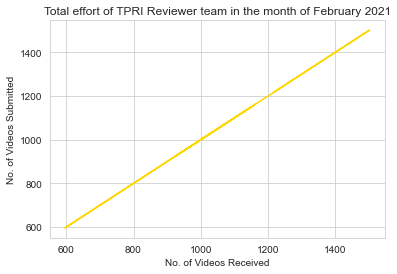

In [215]:
## TPRI reviewer team effort for February 2021
# Total videos received by the reviewers in 1 month (February 2021)
a=data_Aparna['No. of Videos Received'].sum().astype('int')
print("No. of Videos Received by Aparna =",a)
b=data_Kiran['No. of Videos Received'].sum().astype('int')
print("No. of Videos Received by Kiran =", b)
c=data_Mallikarjun['No. of Videos Received'].sum().astype('int')
print("No. of Videos Received by Mallikarjun =",c)
d=data_Narendra['No. of Videos Received'].sum().astype('int')
print("No. of Videos Received by Narendra =",d)
e=data_Rajeshwari['No. of Videos Received'].sum().astype('int')
print("No. of Videos Received by Rajeshwari =",e)
f=data_Shivakumar['No. of Videos Received'].sum().astype('int')
print("No. of Videos Received by Shivakumar =",f)
g=data_Shivam['No. of Videos Received'].sum().astype('int')
print("No. of Videos Received by Shivam =",g)
h=data_Yuvaraja['No. of Videos Received'].sum().astype('int')
print("No. of Videos Received by Yuvaraja =",h)
total_videos_received=a+b+c+d+e+f+g+h
print("Total received videos in the month of February 2021 = ",total_videos_received)

# Total videos submitted by the reviewers in 1 month (February 2021)
a1=data_Aparna['No. of Videos Submitted'].sum().astype('int')
print("No. of Videos Submitted by Aparna =",a1)
b1=data_Kiran['No. of Videos Submitted'].sum().astype('int')
print("No. of Videos Submitted by Kiran =", b1)
c1=data_Mallikarjun['No. of Videos Submitted'].sum().astype('int')
print("No. of Videos Submitted by Mallikarjun =",c1)
d1=data_Narendra['No. of Videos Submitted'].sum().astype('int')
print("No. of Videos Submitted by Narendra =",d1)
e1=data_Rajeshwari['No. of Videos Submitted'].sum().astype('int')
print("No. of Videos Submitted by Rajeshwari =",e1)
f1=data_Shivakumar['No. of Videos Submitted'].sum().astype('int')
print("No. of Videos Submitted by Shivakumar =",f1)
g1=data_Shivam['No. of Videos Submitted'].sum().astype('int')
print("No. of Videos Submitted by Shivam =",g1)
h1=data_Yuvaraja['No. of Videos Submitted'].sum().astype('int')
print("No. of Videos Submitted by Yuvaraja =",h1)
total_videos_submitted=a1+b1+c1+d1+e1+f1+g1+h1
print("Total submitted videos in the month of February 2021 = ",total_videos_submitted)

x = [a,b,c,d,e,f,g,h]
y = [a1,b1,c1,d1,e1,f1,g1,h1]

plt.plot(x, y,color='gold')

plt.title("Total effort of TPRI Reviewer team in the month of February 2021")
plt.xlabel("No. of Videos Received")
plt.ylabel("No. of Videos Submitted")

plt.show()

### Total number of accidents and non-accident reported in a month of February 2021

No. of Accident reported Videos by Aparna = 62
No. of Accident reported Videos by Kiran = 65
No. of Accident reported Videos by Mallikarjun = 31
No. of Accident reported Videos by Narendra = 44
No. of Accident reported Videos by Rajeshwari = 73
No. of Accident reported Videos by Shivakumar = 78
No. of Accident reported Videos by Shivam = 48
No. of Accident reported Videos by Yuvaraja = 55
Total No. of Accident reported Videos in the month of February 2021 =  456


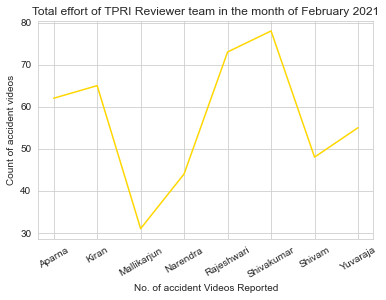

In [216]:
## TPRI reviewer team effort for February 2021
# Total accident videos reported by the reviewers in 1 month (February 2021)
a=data_Aparna['No. of Accident reported Videos'].sum().astype('int')
print("No. of Accident reported Videos by Aparna =",a)
b=data_Kiran['No. of Accident reported Videos'].sum().astype('int')
print("No. of Accident reported Videos by Kiran =", b)
c=data_Mallikarjun['No. of Accident reported Videos'].sum().astype('int')
print("No. of Accident reported Videos by Mallikarjun =",c)
d=data_Narendra['No. of Accident reported Videos'].sum().astype('int')
print("No. of Accident reported Videos by Narendra =",d)
e=data_Rajeshwari['No. of Accident reported Videos'].sum().astype('int')
print("No. of Accident reported Videos by Rajeshwari =",e)
f=data_Shivakumar['No. of Accident reported Videos'].sum().astype('int')
print("No. of Accident reported Videos by Shivakumar =",f)
g=data_Shivam['No. of Accident reported Videos'].sum().astype('int')
print("No. of Accident reported Videos by Shivam =",g)
h=data_Yuvaraja['No. of Accident reported Videos'].sum().astype('int')
print("No. of Accident reported Videos by Yuvaraja =",h)
total_accidents_reported=a+b+c+d+e+f+g+h
print("Total No. of Accident reported Videos in the month of February 2021 = ",total_accidents_reported)

x=['Aparna','Kiran','Mallikarjun','Narendra','Rajeshwari','Shivakumar','Shivam','Yuvaraja']
y = [a,b,c,d,e,f,g,h]

plt.plot(x, y, color='gold')

plt.title("Total effort of TPRI Reviewer team in the month of February 2021")
plt.xlabel("No. of accident Videos Reported")
plt.ylabel("Count of accident videos")
plt.xticks(rotation=30)

plt.show()

No. of non Accident reported Videos by Aparna = 1154
No. of non Accident reported Videos by Kiran = 1446
No. of non Accident reported Videos by Mallikarjun = 565
No. of non Accident reported Videos by Narendra = 1118
No. of non Accident reported Videos by Rajeshwari = 969
No. of non Accident reported Videos by Shivakumar = 1002
No. of non Accident reported Videos by Shivam = 872
No. of non Accident reported Videos by Yuvaraja = 1079
Total non accident videos reported in the month of February 2021 =  8205


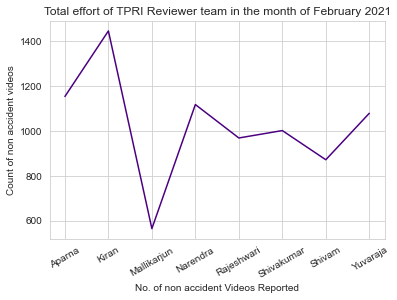

In [217]:
# Total non accident videos reported by the reviewers in 1 month (February 2021)
a1=data_Aparna['No. of non Accident reported Videos'].sum().astype('int')
print("No. of non Accident reported Videos by Aparna =",a1)
b1=data_Kiran['No. of non Accident reported Videos'].sum().astype('int')
print("No. of non Accident reported Videos by Kiran =", b1)
c1=data_Mallikarjun['No. of non Accident reported Videos'].sum().astype('int')
print("No. of non Accident reported Videos by Mallikarjun =",c1)
d1=data_Narendra['No. of non Accident reported Videos'].sum().astype('int')
print("No. of non Accident reported Videos by Narendra =",d1)
e1=data_Rajeshwari['No. of non Accident reported Videos'].sum().astype('int')
print("No. of non Accident reported Videos by Rajeshwari =",e1)
f1=data_Shivakumar['No. of non Accident reported Videos'].sum().astype('int')
print("No. of non Accident reported Videos by Shivakumar =",f1)
g1=data_Shivam['No. of non Accident reported Videos'].sum().astype('int')
print("No. of non Accident reported Videos by Shivam =",g1)
h1=data_Yuvaraja['No. of non Accident reported Videos'].sum().astype('int')
print("No. of non Accident reported Videos by Yuvaraja =",h1)
total_non_accident_videos_reported=a1+b1+c1+d1+e1+f1+g1+h1
print("Total non accident videos reported in the month of February 2021 = ",total_non_accident_videos_reported)

x=['Aparna','Kiran','Mallikarjun','Narendra','Rajeshwari','Shivakumar','Shivam','Yuvaraja']
y = [a1,b1,c1,d1,e1,f1,g1,h1]

plt.plot(x,y, color='indigo')

plt.title("Total effort of TPRI Reviewer team in the month of February 2021")
plt.xlabel("No. of non accident Videos Reported")
plt.ylabel("Count of non accident videos")
plt.xticks(rotation=30)

plt.show()

### Average video length received by TPRI reviewer in the month of February 2021

Average Videos Length in seconds (Approx) by Aparna = 285
Average Videos Length in seconds (Approx) by Kiran = 375
Average Videos Length in seconds (Approx) by Mallikarjun = 270
Average Videos Length in seconds (Approx) by Narendra = 285
Average Videos Length in seconds (Approx) by Rajeshwari = 330
Average Videos Length in seconds (Approx) by Shivakumar = 315
Average Videos Length in seconds (Approx) by Shivam = 360
Average Videos Length in seconds (Approx) by Yuvaraja = 345
Total Average Videos Length in seconds (Approx) in the month of February 2021 =  2565


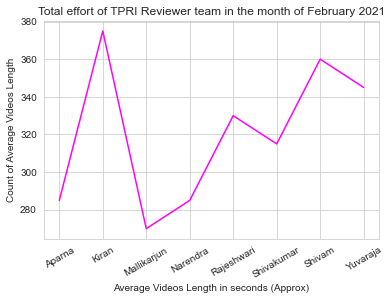

In [218]:
# Total non accident videos reported by the reviewers in 1 month (February 2021)
a1=data_Aparna['Average Videos Length in seconds (Approx)'].sum().astype('int')
print("Average Videos Length in seconds (Approx) by Aparna =",a1)
b1=data_Kiran['Average Videos Length in seconds (Approx)'].sum().astype('int')
print("Average Videos Length in seconds (Approx) by Kiran =", b1)
c1=data_Mallikarjun['Average Videos Length in seconds (Approx)'].sum().astype('int')
print("Average Videos Length in seconds (Approx) by Mallikarjun =",c1)
d1=data_Narendra['Average Videos Length in seconds (Approx)'].sum().astype('int')
print("Average Videos Length in seconds (Approx) by Narendra =",d1)
e1=data_Rajeshwari['Average Videos Length in seconds (Approx)'].sum().astype('int')
print("Average Videos Length in seconds (Approx) by Rajeshwari =",e1)
f1=data_Shivakumar['Average Videos Length in seconds (Approx)'].sum().astype('int')
print("Average Videos Length in seconds (Approx) by Shivakumar =",f1)
g1=data_Shivam['Average Videos Length in seconds (Approx)'].sum().astype('int')
print("Average Videos Length in seconds (Approx) by Shivam =",g1)
h1=data_Yuvaraja['Average Videos Length in seconds (Approx)'].sum().astype('int')
print("Average Videos Length in seconds (Approx) by Yuvaraja =",h1)
total_average_videos_length=a1+b1+c1+d1+e1+f1+g1+h1
print("Total Average Videos Length in seconds (Approx) in the month of February 2021 = ",total_average_videos_length)

x=['Aparna','Kiran','Mallikarjun','Narendra','Rajeshwari','Shivakumar','Shivam','Yuvaraja']
y = [a1,b1,c1,d1,e1,f1,g1,h1]

plt.plot(x,y, color='fuchsia')

plt.title("Total effort of TPRI Reviewer team in the month of February 2021")
plt.xlabel("Average Videos Length in seconds (Approx)")
plt.ylabel("Count of Average Videos Length")
plt.xticks(rotation=30)

plt.show()

### TPRI Effort in the Month of March 2021

### 1. Aparna

In [219]:
data_Aparna=pd.read_excel("C:\\Users\Ishan.Borkar\Downloads\TPRI_agent_Effort_2021\TPRI_agent_Effort_2021_Aparna.xlsx",header=0,date_parser='Date',sheet_name=2)
data_Aparna.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-03-01,55,55,15,4,51,NaN,NaN
1,2021-03-02,376,376,15,6,370,NaN,NaN
2,2021-03-03,157,157,15,11,146,NaN,Shift Exchange with Mallikarjun
3,2021-03-04,122,122,15,2,120,NaN,Shift Exchange with Mallikarjun
4,2021-03-05,74,74,15,6,68,NaN,Shift Exchange with Mallikarjun


In [220]:
Count_Row=data_Aparna.shape[0]-1
data_Aparna=data_Aparna.head(Count_Row)
data_Aparna.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-03-01,55,55,15,4,51,NaN,NaN
1,2021-03-02,376,376,15,6,370,NaN,NaN
2,2021-03-03,157,157,15,11,146,NaN,Shift Exchange with Mallikarjun
3,2021-03-04,122,122,15,2,120,NaN,Shift Exchange with Mallikarjun
4,2021-03-05,74,74,15,6,68,NaN,Shift Exchange with Mallikarjun


In [221]:
print(data_Aparna.shape)

(31, 8)


### 2. Kiran

In [222]:
data_Kiran=pd.read_excel("C:\\Users\Ishan.Borkar\Downloads\TPRI_agent_Effort_2021\TPRI_agent_Effort_2021_Kiran.xlsx",header=0,date_parser='Date',sheet_name=2)
data_Kiran.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-03-01,142,142,15,5,137,NaN,NaN
1,2021-03-02,262,262,15,2,260,NaN,Week off (Mutual Exchange with Mallik)
2,2021-03-03,79,79,15,4,75,NaN,NaN
3,2021-03-04,60,60,15,8,52,NaN,NaN
4,2021-03-05,76,76,15,0,76,NaN,NaN


In [223]:
Count_Row=data_Kiran.shape[0]-1
data_Kiran=data_Kiran.head(Count_Row)
data_Kiran.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-03-01,142,142,15,5,137,NaN,NaN
1,2021-03-02,262,262,15,2,260,NaN,Week off (Mutual Exchange with Mallik)
2,2021-03-03,79,79,15,4,75,NaN,NaN
3,2021-03-04,60,60,15,8,52,NaN,NaN
4,2021-03-05,76,76,15,0,76,NaN,NaN


In [224]:
print(data_Kiran.shape)

(31, 8)


### 3. Mallikarjun

In [225]:
data_Mallikarjun=pd.read_excel("C:\\Users\Ishan.Borkar\Downloads\TPRI_agent_Effort_2021\TPRI_agent_Effort_2021_Mallikarjun.xlsx",header=0,date_parser='Date',sheet_name=2)
data_Mallikarjun.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-03-01,0,0,0,0,0,NaN,Week off
1,2021-03-02,28,28,15,0,28,NaN,Mutual exchange with Kiran
2,2021-03-03,30,30,15,0,30,NaN,Mutual exchange with Aparna
3,2021-03-04,0,0,15,0,0,NaN,Mutual exchange with Aparna
4,2021-03-05,0,0,15,0,0,NaN,Mutual exchange with Aparna


In [226]:
Count_Row=data_Mallikarjun.shape[0]-1
data_Mallikarjun=data_Mallikarjun.head(Count_Row)
data_Mallikarjun.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-03-01,0,0,0,0,0,NaN,Week off
1,2021-03-02,28,28,15,0,28,NaN,Mutual exchange with Kiran
2,2021-03-03,30,30,15,0,30,NaN,Mutual exchange with Aparna
3,2021-03-04,0,0,15,0,0,NaN,Mutual exchange with Aparna
4,2021-03-05,0,0,15,0,0,NaN,Mutual exchange with Aparna


In [227]:
print(data_Mallikarjun.size)

248


### 4. Narendra

In [228]:
data_Narendra=pd.read_excel("C:\\Users\Ishan.Borkar\Downloads\TPRI_agent_Effort_2021\TPRI_agent_Effort_2021_Narendra.xlsx",header=0,date_parser='Date',sheet_name=2)
data_Narendra.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-03-01,155.0,155.0,15.0,6.0,149.0,NaN,NaN
1,2021-03-02,0.0,0.0,0.0,0.0,0.0,NaN,weekoff
2,2021-03-03,125.0,125.0,15.0,5.0,120.0,NaN,NaN
3,2021-03-04,129.0,129.0,15.0,3.0,126.0,NaN,NaN
4,2021-03-05,83.0,83.0,15.0,3.0,80.0,NaN,NaN


In [229]:
Count_Row=data_Narendra.shape[0]-1
data_Narendra=data_Narendra.head(Count_Row)
data_Narendra.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-03-01,155.0,155.0,15.0,6.0,149.0,NaN,NaN
1,2021-03-02,0.0,0.0,0.0,0.0,0.0,NaN,weekoff
2,2021-03-03,125.0,125.0,15.0,5.0,120.0,NaN,NaN
3,2021-03-04,129.0,129.0,15.0,3.0,126.0,NaN,NaN
4,2021-03-05,83.0,83.0,15.0,3.0,80.0,NaN,NaN


In [230]:
print(data_Narendra.size)

248


### 5. Rajeshwari

In [231]:
data_Rajeshwari=pd.read_excel("C:\\Users\Ishan.Borkar\Downloads\TPRI_agent_Effort_2021\TPRI_agent_Effort_2021_Rajeshwari.xlsx",header=0,date_parser='Date',sheet_name=2)
data_Rajeshwari.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-03-01,39,39,15,4,35,NaN,NaN
1,2021-03-02,74,74,15,1,73,NaN,NaN
2,2021-03-03,56,56,15,2,54,NaN,NaN
3,2021-03-04,0,0,0,0,0,NaN,WEEK OFF
4,2021-03-05,0,0,0,0,0,NaN,WEEK OFF


In [232]:
Count_Row=data_Rajeshwari.shape[0]-1
data_Rajeshwari=data_Rajeshwari.head(Count_Row)
data_Rajeshwari.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-03-01,39,39,15,4,35,NaN,NaN
1,2021-03-02,74,74,15,1,73,NaN,NaN
2,2021-03-03,56,56,15,2,54,NaN,NaN
3,2021-03-04,0,0,0,0,0,NaN,WEEK OFF
4,2021-03-05,0,0,0,0,0,NaN,WEEK OFF


In [233]:
print(data_Rajeshwari.size)

248


### 6. Shivamkumar

In [234]:
data_Shivakumar=pd.read_excel("C:\\Users\Ishan.Borkar\Downloads\TPRI_agent_Effort_2021\TPRI_agent_Effort_2021_Shivakumar.xlsx",header=0,date_parser='Date',sheet_name=2)
data_Shivakumar.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-03-01 00:00:00,37,37,15,4,33,NaN,NaN
1,2021-03-02 00:00:00,71,71,15,1,70,NaN,NaN
2,2021-03-03 00:00:00,56,56,15,3,53,NaN,NaN
3,2021-03-04 00:00:00,0,0,0,0,0,NaN,Week Off
4,2021-03-05 00:00:00,0,0,0,0,0,NaN,Week Off


In [235]:
Count_Row=data_Shivakumar.shape[0]-1
data_Shivakumar=data_Shivakumar.head(Count_Row)
data_Shivakumar.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-03-01 00:00:00,37,37,15,4,33,NaN,NaN
1,2021-03-02 00:00:00,71,71,15,1,70,NaN,NaN
2,2021-03-03 00:00:00,56,56,15,3,53,NaN,NaN
3,2021-03-04 00:00:00,0,0,0,0,0,NaN,Week Off
4,2021-03-05 00:00:00,0,0,0,0,0,NaN,Week Off


In [236]:
print(data_Shivakumar.size)

248


### 7. Shivam

In [237]:
data_Shivam=pd.read_excel("C:\\Users\Ishan.Borkar\Downloads\TPRI_agent_Effort_2021\TPRI_agent_Effort_2021_Shivam.xlsx",header=0,date_parser='Date',sheet_name=2)
data_Shivam.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-03-01,45,45,15,3,42,NaN,NaN
1,2021-03-02,151,151,15,2,149,NaN,NaN
2,2021-03-03,0,0,0,0,0,NaN,NaN
3,2021-03-04,35,35,15,3,32,NaN,NaN
4,2021-03-05,33,33,15,2,31,NaN,NaN


In [238]:
Count_Row=data_Shivam.shape[0]-1
data_Shivam=data_Shivam.head(Count_Row)
data_Shivam.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-03-01,45,45,15,3,42,NaN,NaN
1,2021-03-02,151,151,15,2,149,NaN,NaN
2,2021-03-03,0,0,0,0,0,NaN,NaN
3,2021-03-04,35,35,15,3,32,NaN,NaN
4,2021-03-05,33,33,15,2,31,NaN,NaN


In [239]:
print(data_Shivam.size)

248


### 8. Yuvaraja

In [240]:
data_Yuvaraja=pd.read_excel("C://Users/Ishan.Borkar/Downloads/TPRI_agent_Effort_2021/TPRI_agent_Effort_2021_Yuvaraja.xlsx",header=0,date_parser='Date',sheet_name=2)
data_Yuvaraja.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-03-01,0,0,0,0,0,NaN,weekoff
1,2021-03-02,568,568,15,5,563,NaN,NaN
2,2021-03-03,121,121,15,8,113,NaN,NaN
3,2021-03-04,49,49,15,6,43,NaN,NaN
4,2021-03-05,56,56,15,0,56,NaN,NaN


In [241]:
Count_Row=data_Yuvaraja.shape[0]-1
data_Yuvaraja=data_Yuvaraja.head(Count_Row)
data_Yuvaraja.head()

,Date,No. of Videos Received,No. of Videos Submitted,Average Videos Length in seconds (Approx),No. of Accident reported Videos,No. of non Accident reported Videos,Issues/Concern,Remarks
0,2021-03-01,0,0,0,0,0,NaN,weekoff
1,2021-03-02,568,568,15,5,563,NaN,NaN
2,2021-03-03,121,121,15,8,113,NaN,NaN
3,2021-03-04,49,49,15,6,43,NaN,NaN
4,2021-03-05,56,56,15,0,56,NaN,NaN


In [242]:
print(data_Yuvaraja.size)

248


No. of Videos Received by Aparna = 1964
No. of Videos Received by Kiran = 1896
No. of Videos Received by Mallikarjun = 432
No. of Videos Received by Narendra = 697
No. of Videos Received by Rajeshwari = 2475
No. of Videos Received by Shivakumar = 1886
No. of Videos Received by Shivam = 1579
No. of Videos Received by Yuvaraja = 2063
Total received videos in March 2021=  12992
No. of Videos Submitted by Aparna = 1964
No. of Videos Submitted by Kiran = 1896
No. of Videos Submitted by Mallikarjun = 432
No. of Videos Submitted by Narendra = 697
No. of Videos Submitted by Rajeshwari = 2475
No. of Videos Submitted by Shivakumar = 1886
No. of Videos Submitted by Shivam = 1579
No. of Videos Submitted by Yuvaraja = 2063
Total submitted videos in March 2021 =  12992


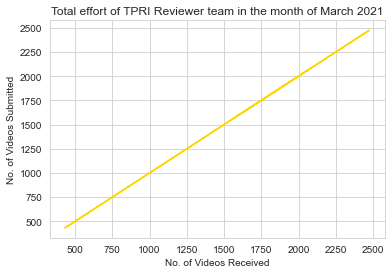

In [243]:
## TPRI reviewer team effort for February 2021
# Total videos received by the reviewers in 1 month (March 2021)
a=data_Aparna['No. of Videos Received'].sum().astype('int')
print("No. of Videos Received by Aparna =",a)
b=data_Kiran['No. of Videos Received'].sum().astype('int')
print("No. of Videos Received by Kiran =", b)
c=data_Mallikarjun['No. of Videos Received'].sum().astype('int')
print("No. of Videos Received by Mallikarjun =",c)
d=data_Narendra['No. of Videos Received'].sum().astype('int')
print("No. of Videos Received by Narendra =",d)
e=data_Rajeshwari['No. of Videos Received'].sum().astype('int')
print("No. of Videos Received by Rajeshwari =",e)
f=data_Shivakumar['No. of Videos Received'].sum().astype('int')
print("No. of Videos Received by Shivakumar =",f)
g=data_Shivam['No. of Videos Received'].sum().astype('int')
print("No. of Videos Received by Shivam =",g)
h=data_Yuvaraja['No. of Videos Received'].sum().astype('int')
print("No. of Videos Received by Yuvaraja =",h)
total_videos_received=a+b+c+d+e+f+g+h
print("Total received videos in March 2021= ",total_videos_received)

# Total videos submitted by the reviewers in 1 month (March 2021)
a1=data_Aparna['No. of Videos Submitted'].sum().astype('int')
print("No. of Videos Submitted by Aparna =",a1)
b1=data_Kiran['No. of Videos Submitted'].sum().astype('int')
print("No. of Videos Submitted by Kiran =", b1)
c1=data_Mallikarjun['No. of Videos Submitted'].sum().astype('int')
print("No. of Videos Submitted by Mallikarjun =",c1)
d1=data_Narendra['No. of Videos Submitted'].sum().astype('int')
print("No. of Videos Submitted by Narendra =",d1)
e1=data_Rajeshwari['No. of Videos Submitted'].sum().astype('int')
print("No. of Videos Submitted by Rajeshwari =",e1)
f1=data_Shivakumar['No. of Videos Submitted'].sum().astype('int')
print("No. of Videos Submitted by Shivakumar =",f1)
g1=data_Shivam['No. of Videos Submitted'].sum().astype('int')
print("No. of Videos Submitted by Shivam =",g1)
h1=data_Yuvaraja['No. of Videos Submitted'].sum().astype('int')
print("No. of Videos Submitted by Yuvaraja =",h1)
total_videos_submitted=a1+b1+c1+d1+e1+f1+g1+h1
print("Total submitted videos in March 2021 = ",total_videos_submitted)

x = [a,b,c,d,e,f,g,h]
y = [a1,b1,c1,d1,e1,f1,g1,h1]

plt.plot(x, y,color='gold')

plt.title("Total effort of TPRI Reviewer team in the month of March 2021")
plt.xlabel("No. of Videos Received")
plt.ylabel("No. of Videos Submitted")

plt.show()

### Total accident and non accident videos reported in the month og March 2021

No. of Accident reported Videos by Aparna = 77
No. of Accident reported Videos by Kiran = 64
No. of Accident reported Videos by Mallikarjun = 18
No. of Accident reported Videos by Narendra = 29
No. of Accident reported Videos by Rajeshwari = 114
No. of Accident reported Videos by Shivakumar = 91
No. of Accident reported Videos by Shivam = 72
No. of Accident reported Videos by Yuvaraja = 70
Total No. of Accident reported Videos in the month of March 2021 =  535


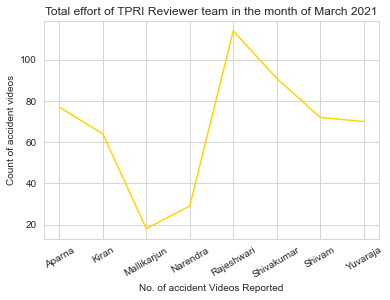

In [244]:
## TPRI reviewer team effort for March 2021
# Total accident videos reported by the reviewers in 1 month (March 2021)
a=data_Aparna['No. of Accident reported Videos'].sum().astype('int')
print("No. of Accident reported Videos by Aparna =",a)
b=data_Kiran['No. of Accident reported Videos'].sum().astype('int')
print("No. of Accident reported Videos by Kiran =", b)
c=data_Mallikarjun['No. of Accident reported Videos'].sum().astype('int')
print("No. of Accident reported Videos by Mallikarjun =",c)
d=data_Narendra['No. of Accident reported Videos'].sum().astype('int')
print("No. of Accident reported Videos by Narendra =",d)
e=data_Rajeshwari['No. of Accident reported Videos'].sum().astype('int')
print("No. of Accident reported Videos by Rajeshwari =",e)
f=data_Shivakumar['No. of Accident reported Videos'].sum().astype('int')
print("No. of Accident reported Videos by Shivakumar =",f)
g=data_Shivam['No. of Accident reported Videos'].sum().astype('int')
print("No. of Accident reported Videos by Shivam =",g)
h=data_Yuvaraja['No. of Accident reported Videos'].sum().astype('int')
print("No. of Accident reported Videos by Yuvaraja =",h)
total_accidents_reported=a+b+c+d+e+f+g+h
print("Total No. of Accident reported Videos in the month of March 2021 = ",total_accidents_reported)

x=['Aparna','Kiran','Mallikarjun','Narendra','Rajeshwari','Shivakumar','Shivam','Yuvaraja']
y = [a,b,c,d,e,f,g,h]

plt.plot(x, y, color='gold')

plt.title("Total effort of TPRI Reviewer team in the month of March 2021")
plt.xlabel("No. of accident Videos Reported")
plt.ylabel("Count of accident videos")
plt.xticks(rotation=30)

plt.show()

No. of non Accident reported Videos by Aparna = 1887
No. of non Accident reported Videos by Kiran = 1832
No. of non Accident reported Videos by Mallikarjun = 414
No. of non Accident reported Videos by Narendra = 668
No. of non Accident reported Videos by Rajeshwari = 2361
No. of non Accident reported Videos by Shivakumar = 1795
No. of non Accident reported Videos by Shivam = 1507
No. of non Accident reported Videos by Yuvaraja = 1993
Total non accident videos reported in the month of March 2021 =  12457


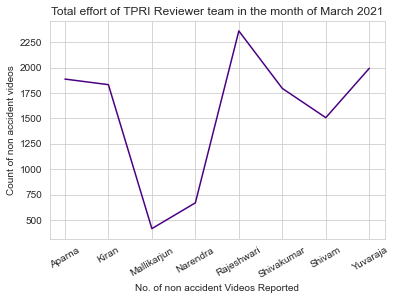

In [245]:
# Total non accident videos reported by the reviewers in 1 month (March 2021)
a1=data_Aparna['No. of non Accident reported Videos'].sum().astype('int')
print("No. of non Accident reported Videos by Aparna =",a1)
b1=data_Kiran['No. of non Accident reported Videos'].sum().astype('int')
print("No. of non Accident reported Videos by Kiran =", b1)
c1=data_Mallikarjun['No. of non Accident reported Videos'].sum().astype('int')
print("No. of non Accident reported Videos by Mallikarjun =",c1)
d1=data_Narendra['No. of non Accident reported Videos'].sum().astype('int')
print("No. of non Accident reported Videos by Narendra =",d1)
e1=data_Rajeshwari['No. of non Accident reported Videos'].sum().astype('int')
print("No. of non Accident reported Videos by Rajeshwari =",e1)
f1=data_Shivakumar['No. of non Accident reported Videos'].sum().astype('int')
print("No. of non Accident reported Videos by Shivakumar =",f1)
g1=data_Shivam['No. of non Accident reported Videos'].sum().astype('int')
print("No. of non Accident reported Videos by Shivam =",g1)
h1=data_Yuvaraja['No. of non Accident reported Videos'].sum().astype('int')
print("No. of non Accident reported Videos by Yuvaraja =",h1)
total_non_accident_videos_reported=a1+b1+c1+d1+e1+f1+g1+h1
print("Total non accident videos reported in the month of March 2021 = ",total_non_accident_videos_reported)

x=['Aparna','Kiran','Mallikarjun','Narendra','Rajeshwari','Shivakumar','Shivam','Yuvaraja']
y = [a1,b1,c1,d1,e1,f1,g1,h1]

plt.plot(x,y, color='indigo')

plt.title("Total effort of TPRI Reviewer team in the month of March 2021")
plt.xlabel("No. of non accident Videos Reported")
plt.ylabel("Count of non accident videos")
plt.xticks(rotation=30)

plt.show()

## Total average video length received by reviewer in March 2021

Average Videos Length in seconds (Approx) by Aparna = 360
Average Videos Length in seconds (Approx) by Kiran = 465
Average Videos Length in seconds (Approx) by Mallikarjun = 405
Average Videos Length in seconds (Approx) by Narendra = 165
Average Videos Length in seconds (Approx) by Rajeshwari = 390
Average Videos Length in seconds (Approx) by Shivakumar = 360
Average Videos Length in seconds (Approx) by Shivam = 345
Average Videos Length in seconds (Approx) by Yuvaraja = 420
Total Average Videos Length in seconds (Approx) in the month of March 2021 =  2910


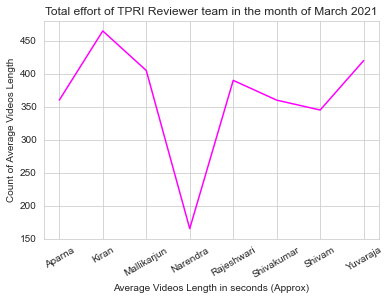

In [246]:
a1=data_Aparna['Average Videos Length in seconds (Approx)'].sum().astype('int')
print("Average Videos Length in seconds (Approx) by Aparna =",a1)
b1=data_Kiran['Average Videos Length in seconds (Approx)'].sum().astype('int')
print("Average Videos Length in seconds (Approx) by Kiran =", b1)
c1=data_Mallikarjun['Average Videos Length in seconds (Approx)'].sum().astype('int')
print("Average Videos Length in seconds (Approx) by Mallikarjun =",c1)
d1=data_Narendra['Average Videos Length in seconds (Approx)'].sum().astype('int')
print("Average Videos Length in seconds (Approx) by Narendra =",d1)
e1=data_Rajeshwari['Average Videos Length in seconds (Approx)'].sum().astype('int')
print("Average Videos Length in seconds (Approx) by Rajeshwari =",e1)
f1=data_Shivakumar['Average Videos Length in seconds (Approx)'].sum().astype('int')
print("Average Videos Length in seconds (Approx) by Shivakumar =",f1)
g1=data_Shivam['Average Videos Length in seconds (Approx)'].sum().astype('int')
print("Average Videos Length in seconds (Approx) by Shivam =",g1)
h1=data_Yuvaraja['Average Videos Length in seconds (Approx)'].sum().astype('int')
print("Average Videos Length in seconds (Approx) by Yuvaraja =",h1)
total_average_videos_length=a1+b1+c1+d1+e1+f1+g1+h1
print("Total Average Videos Length in seconds (Approx) in the month of March 2021 = ",total_average_videos_length)

x=['Aparna','Kiran','Mallikarjun','Narendra','Rajeshwari','Shivakumar','Shivam','Yuvaraja']
y = [a1,b1,c1,d1,e1,f1,g1,h1]

plt.plot(x,y, color='fuchsia')

plt.title("Total effort of TPRI Reviewer team in the month of March 2021")
plt.xlabel("Average Videos Length in seconds (Approx)")
plt.ylabel("Count of Average Videos Length")
plt.xticks(rotation=30)

plt.show()

## VI) Load the dataset of Reviewers support

In [247]:
data_reviewers_support=pd.read_excel("C:\\Users\Ishan.Borkar\Downloads\TPRI_agent_Effort_2021\Msi Reviewers support ch.xlsx",header=0)
data_reviewers_support.head()

,Link to incident,link to slack,Rating,Remarks
0,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Accident,NaN
1,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,No accident,NaN
2,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Accident,NaN
3,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,No accident,NaN
4,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,No accident,NaN


In [248]:
data_reviewers_support.shape

(118, 4)

In [249]:
data_reviewers_support.size

472

In [250]:
data_reviewers_support.isna().sum().to_frame().T

,Link to incident,link to slack,Rating,Remarks
0,19,3,3,61


In [251]:
data_reviewers_support['Rating'].unique()

array(['Accident', 'No accident', 'missed accident',
       'only 1 reviewer for 2 hours', 'Wrong rating - No Accident',
       'missed collision', '1hr 04mins - 1 reviewer only',
       'Wrong rating - should be No Accident',
       'grabbed No submitted review', '1hour to submit review',
       '4:04 last submitted- 6:37 grabbed= 2h 33m ',
       'Wrong rating - rated as No accident',
       'Wrong rating - rated as Accident',
       'P1 missed accident - review resubmitted',
       'Wrong rating - should be Accident', nan, 'Hard to rate incidents',
       'last grabbed incident '], dtype=object)

In [252]:
data_reviewers_support['Rating'].unique()

array(['Accident', 'No accident', 'missed accident',
       'only 1 reviewer for 2 hours', 'Wrong rating - No Accident',
       'missed collision', '1hr 04mins - 1 reviewer only',
       'Wrong rating - should be No Accident',
       'grabbed No submitted review', '1hour to submit review',
       '4:04 last submitted- 6:37 grabbed= 2h 33m ',
       'Wrong rating - rated as No accident',
       'Wrong rating - rated as Accident',
       'P1 missed accident - review resubmitted',
       'Wrong rating - should be Accident', nan, 'Hard to rate incidents',
       'last grabbed incident '], dtype=object)

In [253]:
data_reviewers_support['Rating'].value_counts()

missed collision                              23
Accident                                      21
No accident                                   18
Wrong rating - should be Accident             18
Wrong rating - should be No Accident          15
missed accident                                5
Wrong rating - rated as No accident            3
only 1 reviewer for 2 hours                    2
Wrong rating - No Accident                     2
Wrong rating - rated as Accident               1
grabbed No submitted review                    1
1hour to submit review                         1
1hr 04mins - 1 reviewer only                   1
P1 missed accident - review resubmitted        1
Hard to rate incidents                         1
last grabbed incident                          1
4:04 last submitted- 6:37 grabbed= 2h 33m      1
Name: Rating, dtype: int64

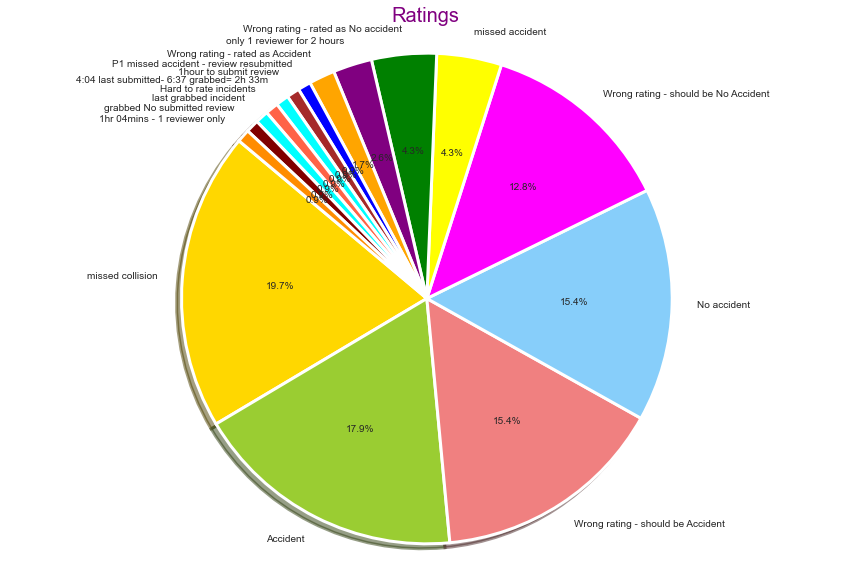

In [254]:
labels=['missed collision',
'Accident',                                      
'Wrong rating - should be Accident',             
'No accident',                                   
'Wrong rating - should be No Accident',          
'missed accident',                                
'Wrong rating - rated as No accident',            
'only 1 reviewer for 2 hours',                    
'Wrong rating - rated as Accident',               
'P1 missed accident - review resubmitted',        
'1hour to submit review',                         
'4:04 last submitted- 6:37 grabbed= 2h 33m',      
'Hard to rate incidents',                         
'last grabbed incident',                          
'grabbed No submitted review',                    
'1hr 04mins - 1 reviewer only']
sizes = [23,21,18,18,15,5,5,3,2,1,1,1,1,1,1,1]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','magenta',
         'yellow','green','purple','orange','blue','brown',
         'cyan','tomato','aqua','maroon','darkorange']
explode = (0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0)  # explode 1st slice

# Plot
plt.figure(figsize=(15,10))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, 
        startangle=140,wedgeprops = {'linewidth': 3})
plt.axis('equal')
plt.title('Ratings',color='purple',fontdict={'fontsize':20})
plt.show()

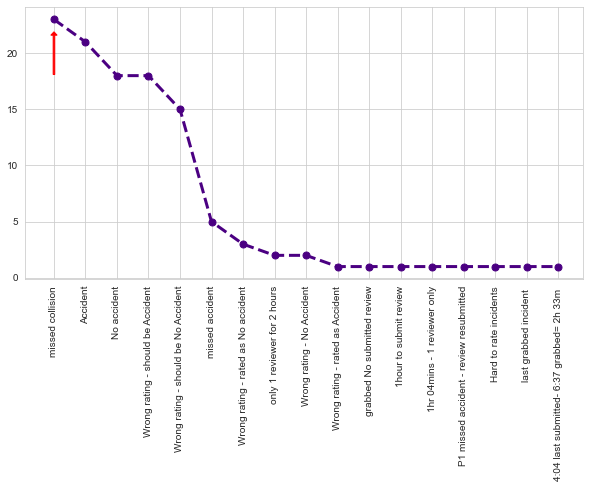

In [255]:
X=data_reviewers_support['Rating'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(X,color='indigo', marker='o', linestyle='dashed',linewidth=3, markersize=7)
plt.xticks(rotation=90)
plt.arrow(0, 18.1, 0, 3.5, head_width = 0.2,width = 0.05,ec ='red',fc='red',)
plt.show()

In [256]:
a=data_reviewers_support['Remarks'].unique()
a

array([nan, 'FC only ',
       'https://nexar.slack.com/archives/C01ESDUFXT4/p1610152450215100',
       'Shiva Kumar - Yuvaraja', 'Narendra', 'Shivam - Aparna',
       'Yuvaraja - Aparna', 'Shivam', 'Aparna - Shivam', 'Rajeshwari',
       'Shiva Kumar', 'Shivam - Yuvaraj', 'Kiran - Narendra',
       'Shiva Kumar - Rajeshwari', 'Kiran - Yuvaraj', 'Kiran - Aparna',
       'Narendra - Aparna', 'Shiva - Shivam', 'Shiva - Rajeshwari',
       'Mallikarjun - Yuvaraja', 'Kiran - Shivam', 'Aparna',
       'Mallikarjun - Aparna', 'Yuvaraja', 'Mallikarjun', 'Kiran',
       'Leenu - Shiva'], dtype=object)

In [257]:
b=data_reviewers_support['Remarks'].value_counts()
b

Aparna - Shivam                                                   9
Shivam - Aparna                                                   6
Shivam                                                            4
Narendra                                                          4
Kiran - Yuvaraj                                                   4
Shiva Kumar                                                       3
Kiran - Narendra                                                  3
Yuvaraja - Aparna                                                 2
Leenu - Shiva                                                     2
Narendra - Aparna                                                 2
Shiva - Rajeshwari                                                2
Rajeshwari                                                        2
Shiva Kumar - Yuvaraja                                            1
Shivam - Yuvaraj                                                  1
Yuvaraja                                        

In [258]:
data_reviewers_support.groupby(by=['Remarks'])['Remarks'].count()

Remarks
Aparna                                                            1
Aparna - Shivam                                                   9
FC only                                                           1
Kiran                                                             1
Kiran - Aparna                                                    1
Kiran - Narendra                                                  3
Kiran - Shivam                                                    1
Kiran - Yuvaraj                                                   4
Leenu - Shiva                                                     2
Mallikarjun                                                       1
Mallikarjun - Aparna                                              1
Mallikarjun - Yuvaraja                                            1
Narendra                                                          4
Narendra - Aparna                                                 2
Rajeshwari                              

In [259]:
labels=data_reviewers_support['Remarks'].nunique()
labels

26

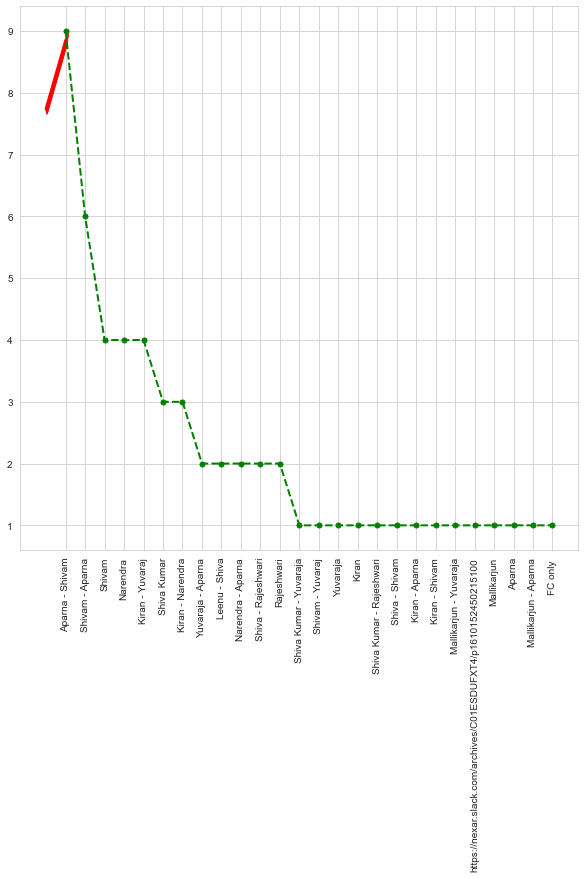

In [260]:
X=data_reviewers_support['Remarks'].value_counts()
plt.figure(figsize=(10,10))
plt.plot(X,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=90)
plt.arrow(-1, 7.7, 1, 1.1, head_width = 0.15,width = 0.14,ec ='red',fc='red')
plt.show()